## Spotify EDA & Feature Engineering

##### dataset source: https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets?select=tracks.csv
##### columns description: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

### Description
<p>Spotify is the world's largest music streaming service provider with over 489 million active users. As a result, the amount of data 
generated by Spotify is literally tremendous. Every day new and new tracks, podcasts and albums come on service board. More than 100 million tracks 
of any type are available on demand. That's why it gives a great opportunity to start our journey with manipulating and analyzing data.
And this is what I aim at by creating this Exploratory Data Analysis. This is my first Kaggle notebook where I try to dig into data
and gain some insights about music industry.</p>

### Main goal
As said earlier, the main goal is to analyze Spotify dataset at different angles. In fact, this analysis is comprised of 2 datasets
merged together, namely: tracks and artists. In many analyses, there's only one dataset with all available data.
Here, I join two various datasets and when it's done I proceed with appropriate analysis. This particular project will be 
divided into 3 parts:
- Datasets merge
- EDA
- Feature Engineering

With regard to Feature Engineering I just touched the topic performing some general engineering. Depending on prospective 
ML model to evaluate FE should be adjusted accordingly. 

Wrapping up, in this notebook, I will be carrying out EDA with elements of FE which should be practical and easy to understand.
This analysis has a potential to grow and expand, especially in machine learning direction.

### 1. Datasets merge

We start off with merging two datasets available publicly (and also attached to my notebook): tracks.csv and artists.csv
Detailed columns description is available on Spotify website: 
- Audio tracks - https://developer.spotify.com/documentation/web-api/reference/get-audio-features
- Artists - https://developer.spotify.com/documentation/web-api/reference/get-an-artist

Let's catch a glimpse at both datasets separately, before they are merged: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


df_tracks = pd.read_csv('data_app/tracks.csv')
df_artists = pd.read_csv('data_app/artists.csv')

df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

We have 20 features in dataset. Most of them are numeric ones.

In [2]:
df_tracks.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4         1922         0.402  0.1580    3   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674            0.7440     0.151    0.127  104.851               3  
1         0.797            0.0000     0.148    0.655  102.009               1  
2         0.994            0.0218     0.212    0.457  130.418               5  
3         0.995            0.9180     0.104    0.397  169.980               3  
4         0.989            0.1300     0.311    0.196  103.220               4

In [3]:
df_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


In [4]:
df_artists.head()

id  followers genres  \
0  0DheY5irMjBUeLybbCUEZ2        0.0     []   
1  0DlhY15l3wsrnlfGio2bjU        5.0     []   
2  0DmRESX2JknGPQyO15yxg7        0.0     []   
3  0DmhnbHjm1qw6NCYPeZNgJ        0.0     []   
4  0Dn11fWM7vHQ3rinvWEl4E        2.0     []   

                                             name  popularity  
0  Armid & Amir Zare Pashai feat. Sara Rouzbehani           0  
1                                     ปูนา ภาวิณี           0  
2                                           Sadaa           0  
3                                       Tra'gruda           0  
4                          Ioannis Panoutsopoulos           0

In [5]:
df_tracks.shape

(586672, 20)

In [6]:
df_artists.shape

(1104349, 5)

Artists dataset definitely outnumbers tracks dataset in terms of number of rows.

Before we join the tables we should check if there are any duplicates:

In [7]:
dupl_tracks = df_tracks.duplicated().value_counts()
dupl_artists = df_artists.duplicated().value_counts()

check_dupl = f'duplicated tracks: {dupl_tracks} \n duplicated artists: {dupl_artists}'
print(check_dupl)

duplicated tracks: False    586672
dtype: int64 
 duplicated artists: False    1104349
dtype: int64


There are no duplicates, we can join datasets. We want to merge tables by id and id_artists columns. We need one id_artists 
value in a row, unfortunately there are multiple ids in an array. First, we need to clean id_artists column by removing 
square brackets:

In [8]:
df_tracks['id_artists'] = df_tracks['id_artists'].str.replace("\['", "").str.replace("\']","").str.replace("'","")

Let's find all records with more than one artist id.
tutaj szukamy w sprytny sposób: bierzemy index przecinka różny od -1, na tej pozycji na pewno przecinka nigdy tu nie będzie.
Find wyszuka przecinek w tekście jeśli istnieje i zwróci tylko te rekordy dla których indeks przecinka jest =! -1, wtedy
zwrócimy wszystkie pozycje z przecinkiem.

In [9]:
df_tracks[df_tracks['id_artists'].str.find(",") != -1]

id                               name  popularity  \
36      1MD0Obbza9l0t0Zpgcwagy                           And Mimi           0   
37      1O9iZyzufN1fUdVO97mmm5                  How High the Moon           0   
84      3h8ioTTWfrC25hrHwQQpLc              All Or Nothing at All           0   
96      4DE7VBCgyTjqV0Plc9Ra0U  Hush-A-Bye (Wee Rose of Kilarney)           0   
130     6GhbZRE9N2TPf86zI1dIxQ                  You'll Never Know           0   
...                        ...                                ...         ...   
586638  3wGIJgoBmapSwFjafNJQ6X                 Allies (FYHYM2019)           1   
586642  44tvGaqisGSy4Qy45vd0CF        Thousand Pieces (FYHYM2019)           1   
586643  1932nBdtEgMpDGkpl93cS4           Saving Angel (FYHYM2019)           1   
586663  4ow9HehIdFii1cggylW2k0                         四季予你 - DJ版          47   
586670  45XJsGpFTyzbzeWK8VzR8S                    A Day At A Time          58   

        duration_ms  explicit  \
36           186147         0   
37           175333         0   
84           164320         0   
96           156880         0   
130          165253         0   
...             ...       ...   
586638        55651         0   
586642        83477         0   
586643       125216         0   
586663       156393         0   
586670       142003         0   

                                                  artists  \
36      ['Dick Haymes', 'Gordon Jenkins', 'His Orchest...   
37        ['Dick Haymes', 'Harry James', 'His Orchestra']   
84        ['Dick Haymes', 'Harry James', 'His Orchestra']   
96       ['Dick Haymes', 'Victor Young', 'His Orchestra']   
130                    ['Dick Haymes', 'The Pied Pipers']   
...                                                   ...   
586638                       ['Davey Asprey', 'Beatsole']   
586642           ['A & Z', 'Claudiu Adam', 'Clara Yates']   
586643                             ['RAM', 'Stine Grove']   
586663                                       ['程響', '阿卓']   
586670                    ['Gentle Bones', 'Clara Benin']   

                                               id_artists release_date  \
36      3BiJGZsyX9sJchTqcSA7Su, 58wzyK6DupVsypvs3QV2Fo...         1922   
37      3BiJGZsyX9sJchTqcSA7Su, 5MpELOfAiq7aIBTij30phD...         1922   
84      3BiJGZsyX9sJchTqcSA7Su, 5MpELOfAiq7aIBTij30phD...         1922   
96      3BiJGZsyX9sJchTqcSA7Su, 3HqN7Sq7rmpOEI9UV5ERuz...         1922   
130        3BiJGZsyX9sJchTqcSA7Su, 5o8E07TcYqIefZpDejymAd         1922   
...                                                   ...          ...   
586638     7luLRXGBygBN8vUO8T9uHf, 6Gs2jNsD9XkEYUJZOSx4qk   2020-01-05   
586642  22y1A8uijPBYxDPOrMWZPb, 78JtIs2G2CpfOZadEs1sUK...   2020-01-05   
586643     4f0a5IgkYFHFts5Z9N9SDX, 51GkQKgac6wqdicVA2DvPu   2020-01-05   
586663     7nKA1c1Qn6nI0XA8yburf3, 7g8hOWXtGS16J30CMU1SR7   2020-12-29   
586670     4jGPdu95icCKVF31CcFKbS, 5ebPSE9YI5aLeZ1Z2gkqjn   2021-03-05   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
36             0.284   0.223    9   -15.733     0       0.0453      0.980000   
37             0.328   0.307    0   -11.573     1       0.0484      0.989000   
84             0.237   0.555    2    -6.611     0       0.0401      0.812000   
96             0.279   0.128    0   -19.793     1       0.0406      0.994000   
130            0.392   0.128    2   -15.220     1       0.0378      0.994000   
...              ...     ...  ...       ...   ...          ...           ...   
586638         0.462   0.953    1    -7.582     0       0.1190      0.003440   
586642         0.393   0.997    1    -6.145     0       0.1450      0.000239   
586643         0.458   0.997    6    -6.124     0       0.1940      0.000898   
586663         0.677   0.970    0    -3.388     0       0.0446      0.134000   
586670         0.696   0.615   10    -6.212     1       0.0345      0.206000   

        instrumentalness  liveness  valence    tempo  time_signature  
36  

Before merge let's analyze genres column. This column will be added to the final, merged dataset:

In [10]:
unique_genres = df_artists['genres'].nunique() 
print(f'Number of unique genres: {unique_genres}')

Number of unique genres: 48788


Since the number of unique values is really big let's focus on values which account for the majority of the column:

In [11]:
df_artists['genres'].value_counts().sort_values(ascending=False)

[]                                                                        805733
['background piano']                                                         293
['calming instrumental']                                                     255
['background music']                                                         245
['barnmusik']                                                                224
                                                                           ...  
['bergamo indie', 'italian indie pop', 'r&b italiano']                         1
['21st century classical', 'british contemporary classical', 'tzadik']         1
['norwegian experimental', 'swedish experimental']                             1
['oud', 'sefardi']                                                             1
['australian post-hardcore', 'metallic hardcore']                              1
Name: genres, Length: 48788, dtype: int64

As we can see most of the column values are empty arrays []. Let's check the ratio:

In [12]:
num = df_artists['genres'].value_counts()['[]']
perc = df_artists['genres'].value_counts(normalize=True)['[]']

print(f'Total number of empty entries is {num}, which accounts for {perc:.2%} of the column.')

Total number of empty entries is 805733, which accounts for 72.96% of the column.


We don't want empty arrays in the column and we don't want to show them in the final, merged dataset either.
Replace them with NaN values. At the same time extract first element from each array in a row - it's gonna be our top genre. 
Genres column is a string of lists so first we need to convert them to list object.
After that we will be able to extract first element of an array to be our final genre. We use ast.literal_eval to perform this 
operation:

In [13]:
import ast

def get_top_element(x):
    if x == '[]':
        return np.nan
    return ast.literal_eval(x)[0]

df_artists['top_genre'] = df_artists['genres'].apply(get_top_element)

Now display our top genres without NaN values:

In [14]:
df_artists[df_artists['top_genre'].notna()]

id  followers                            genres  \
45       0VLMVnVbJyJ4oyZs2L3Yl2       71.0                ['carnaval cadiz']   
46       0dt23bs4w8zx154C5xdVyl       63.0                ['carnaval cadiz']   
47       0pGhoB99qpEJEsBQxgaskQ       64.0                ['carnaval cadiz']   
48       3HDrX2OtSuXLW5dLR85uN3       53.0                ['carnaval cadiz']   
136      22mLrN5fkppmuUPsHx6i2G       59.0        ['classical harp', 'harp']   
...                         ...        ...                               ...   
1104328  1q9C5XlekzXbRLIuLCDTre    90087.0  ['social media pop', 'teen pop']   
1104331  4fh2BIKYPFvXFsQLhaeVJp      309.0                      ['la indie']   
1104334  7akMsd2vb4xowNTehv3gsY      774.0                 ['indie rockism']   
1104336  35m7AJrUCtHYHyIUhCzmgi      205.0                 ['indie rockism']   
1104345  1ljurfXKPlGncNdW3J8zJ8     2123.0             ['deep acoustic pop']   

                                 name  popularity          top_genre  
45       Las Viudas De Los Bisabuelos           6     carnaval cadiz  
46                  Los De Capuchinos           5     carnaval cadiz  
47                 Los “Pofesionales”           7     carnaval cadiz  
48          Los Que No Paran De Rajar           6     carnaval cadiz  
136                       Vera Dulova           3     classical harp  
...                               ...         ...                ...  
1104328                  Brent Rivera          33   social media pop  
1104331                   Lone Kodiak          20           la indie  
1104334                    The Str!ke           0      indie rockism  
1104336                 Hunter Fraser           6      indie rockism  
1104345               Right the Stars          18  deep acoustic pop  

[298616 rows x 6 columns]

It's quite obvious we are going to merge artists dataset by id column. We should make sure that there are no missings,
duplicates or other unexpected entries:

In [15]:
miss = df_artists['id'].isnull().sum()
dupl = df_artists['id'].duplicated().sum()

print(f'There are {miss} missing values and {dupl} duplicated values.')

There are 0 missing values and 0 duplicated values.


Usually, so that to check if there are any unexpected values we coerce non-numerical values to NaN, then count all nulls to check 
if there're any. In this case we just count values and order in descending order to check if there are no 'strange' entries
(like single signs e.g. !, @, $ , numbers only, short strings etc.):

In [16]:
df_artists['id'].value_counts().sort_values(ascending=False)

0DheY5irMjBUeLybbCUEZ2    1
0DxcE03jyjg3wQVHUQKx8C    1
0DxsGcq4ILa7Ss2CmZfipk    1
0DmRESX2JknGPQyO15yxg7    1
0DmhnbHjm1qw6NCYPeZNgJ    1
                         ..
723ZQOt6itOVoTEx3VXUeP    1
3uA4pNhtZcKXz6ccf54Qjh    1
3UqGUvLLvbbxxpg2GUTwnL    1
6IllWwuEZXv8D8Z3zq41Uu    1
5m0Y4WSYyai2BU752lCASy    1
Name: id, Length: 1104349, dtype: int64

Since id column is crucial in merging operation we want to double check if length of each id is the same throughout the whole
column:

In [17]:
# id length = 22
df_artists['id'].str.len().sort_values(ascending=False)

0          22
736239     22
736225     22
736226     22
736227     22
           ..
368121     22
368122     22
368123     22
368124     22
1104348    22
Name: id, Length: 1104349, dtype: int64

Make sure there is no id less that 22 signs.

In [18]:
df_artists[df_artists['id'].str.len().sort_values(ascending=False).apply(lambda x: x < 22)]

Empty DataFrame
Columns: [id, followers, genres, name, popularity, top_genre]
Index: []

Our id column is ready to join with df_tracks dataset, all ids are of the same length. Now, let's keep going with cleaning 
our df_tracks dataset. We want to extract first 'id' occurence in id_artists column - that's because we need to join both 
tables by one, unique id, not 2 or more id-s. At the same time we want to extract first occurance in artists column - top 
artist. We need to keep both column - artists and top_artist and keep them in final dataset:

In [19]:
df_tracks['id_artists']=df_tracks['id_artists'].str.split(',').str[0]
df_tracks['top_artist']=df_tracks['artists'].apply(get_top_element)

Before we merge both tables let's check for missing values or anomalies in key column used to merge datsets - id_artists:

In [20]:
nulls_artists = df_tracks['id_artists'].isnull().sum()
dupl_artists = df_tracks['id_artists'].duplicated().sum()

Duplicated artists are ok, we accept them. In fact we need to check if there are no duplicates in id column:

In [21]:
dupl_id = df_tracks['id'].duplicated().sum()

null_dupl = (f'There are {nulls_artists} null values and {dupl_artists} duplicated values in id_artists. Also {dupl_id} duplicated id.')
print(null_dupl)

There are 0 null values and 515141 duplicated values in id_artists. Also 0 duplicated id.


All rows are unique. Our dataset is ready for merge.
It's time to join both tables. Now check if merge keys are unique in a dataset on a right side by adding validate parameter:

In [22]:
cols_artists = ['id', 'followers', 'popularity', 'top_genre']
df_merged = df_tracks.merge(df_artists[cols_artists], how='left', left_on='id_artists', right_on='id', validate='many_to_one')
df_merged

id_x                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4       08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                        ...                                  ...   
586667  5rgu12WBIHQtvej2MdHSH0                                  云与海   
586668  0NuWgxEp51CutD2pJoF4OM                                blind   
586669  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586670  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586671  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity_x  duration_ms  explicit                          artists  \
0                  6       126903         0                          ['Uli']   
1                  0        98200         0              ['Fernando Pessoa']   
2                  0       181640         0              ['Ignacio Corsini']   
3                  0       176907         0              ['Ignacio Corsini']   
4                  0       163080         0                  ['Dick Haymes']   
...              ...          ...       ...                              ...   
586667            50       258267         0                      ['阿YueYue']   
586668            72       153293         0                   ['ROLE MODEL']   
586669            70       187601         0                      ['FINNEAS']   
586670            58       142003         0  ['Gentle Bones', 'Clara Benin']   
586671            38       214360         0                    ['Afrosound']   

                    id_artists release_date  danceability  energy  ...  \
0       45tIt06XoI0Iio4LBEVpls   1922-02-22         0.645  0.4450  ...   
1       14jtPCOoNZwquk5wd9DxrY   1922-06-01         0.695  0.2630  ...   
2       5LiOoJbxVSAMkBS2fUm3X2   1922-03-21         0.434  0.1770  ...   
3       5LiOoJbxVSAMkBS2fUm3X2   1922-03-21         0.321  0.0946  ...   
4       3BiJGZsyX9sJchTqcSA7Su         1922         0.402  0.1580  ...   
...                        ...          ...           ...     ...  ...   
586667  1QLBXKM5GCpyQQSVMNZqrZ   2020-09-26         0.560  0.5180  ...   
586668  1dy5WNgIKQU6ezkpZs4y8z   2020-10-21         0.765  0.6630  ...   
586669  37M5pPGs6V1fchFJSgCguX   2020-09-02         0.535  0.3140  ...   
586670  4jGPdu95icCKVF31CcFKbS   2021-03-05         0.696  0.6150  ...   
586671  0i4Qda0k4nf7jnNHmSNpYv   2015-07-01         0.686  0.7230  ...   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.744000    0.1510   0.1270  104.851               3   
1               0.000000    0.1480   0.6550  102.009               1   
2               0.021800    0.2120   0.4570  130.418               5   
3               0.918000    0.1040   0.3970  169.980               3   
4               0.130000    0.3110   0.1960  103.220               4   
...                  ...       ...      ...      ...             ...   
586667          0.000000    0.0648   0.2110  131.896               4   
586668          0.000297    0.0924   0.6860  150.091               4   
586669          0.000150    0.0874   0.0663  145.095               4   
586670          0.000003    0.3050   0.4380   90.029               4   
586671          0.000000    0.2640   0.9750  112.204               4   

             top_artist                    id_y  followers  popularity_y  \
0                   Uli  45tIt06XoI0Iio4LBEVpls       91.0           4.0   
1       Fernando Pessoa  14jtPCOoNZwquk5wd9DxrY        3.0           0.0   
2       Ignacio Corsini  5LiOoJbxVSAMkBS2fUm3X2     3528.0          23.0   
3       Ignacio Corsini  5LiOoJbxVSAMkBS2fUm3X2     3528.0          23.0   
4           Dick Haymes  3BiJGZsyX9sJchTqcSA7Su    11327.0          35.0   
..

Let's compare the length of both datasets - merged and df_tracks. We used left join so we kept all rows from df_tracks. That's
why we compare if their length is the same:

In [23]:
merged_check = df_merged.shape[0]
tracks_check = df_tracks.shape[0]

merged_txt = f'df_merged length: {merged_check}, df_tracks length: {tracks_check}'
print(merged_txt)

df_merged length: 586672, df_tracks length: 586672


Either dataset has the same length. As a final check let's compare 'joined' columns - id_artists and id_y. 
We are particularly interested if there are any not-joined artists from df_artists:

In [24]:
nulls_id_y = df_merged['id_y'].isnull().sum()
print(f'There are {nulls_id_y} in "id_y" column.')

There are 12415 in "id_y" column.


As we can see there are 12415 NaN values - there are no such artists in df_artists. Let's find these rows:

In [25]:
df_merged[df_merged['id_y'].isnull()]

id_x  \
9709    0VHoDqq7N5VH1UX93Mdyfj   
9731    0cSyeb33PyBMtLeUzCgDgO   
9823    1GYoPjJvGyYufhbxZmAKmF   
10046   2nUaz5sLG0HccdACC1IG35   
10048   2oYfdKTcUpk3xJZm0CkHJm   
...                        ...   
586601  34poy7O4eWyM5cKnr7voSk   
586610  7LbA0TTyHMuI9nK2gfQGcs   
586656  65hdygJXXOBGKS76EKvxth   
586659  7JWoMpoxEl3pZ2CLZxM6ms   
586666  1ZwZsVZUiyFwIHMNpI3ERt   

                                                     name  popularity_x  \
9709                                                  Air             0   
9731                                     concerto piccolo             0   
9823                                        drume negrita             0   
10046                      i know that my redeemer liveth             0   
10048                                          summertime             0   
...                                                   ...           ...   
586601                               Havana (Workout Mix)             0   
586610  Heart and Womb Noise – BABY SLEEP Loopable, No...            45   
586656                                              醒不来的梦            50   
586659                                               天空之外            49   
586666                                         Skyscraper             4   

        duration_ms  explicit  \
9709         268400         0   
9731         279600         0   
9823         182400         0   
10046        236733         0   
10048        246667         0   
...             ...       ...   
586601       270000         0   
586610        61099         0   
586656       232297         0   
586659       367192         0   
586666       106002         0   

                                                  artists  \
9709        ['n/a', 'Johann Sebastian Bach', 'In Motion']   
9731             ['n/a', 'Nitsch, Johannes', 'In Motion']   
9823              ['n/a', 'Grenet, Ernesto', 'In Motion']   
10046   ['n/a', 'Händel, Georg Friedrich (DP)', 'In Mo...   
10048             ['n/a', 'George Gershwin', 'In Motion']   
...                                                   ...   
586601                               ['The Gym Allstars']   
586610                                  ['Baby Shushing']   
586656                                            ['回小仙']   
586659                                            ['解语花']   
586666                                    ['Emilie Chin']   

                    id_artists release_date  danceability  energy  ...  \
9709    2pKBejGoRlzAc5VHQ0R26E         1935         0.317   0.317  ...   
9731    2pKBejGoRlzAc5VHQ0R26E         1935         0.535   0.435  ...   
9823    2pKBejGoRlzAc5VHQ0R26E         1935         0.628   0.661  ...   
10046   2pKBejGoRlzAc5VHQ0R26E         1935         0.492   0.286  ...   
10048   2pKBejGoRlzAc5VHQ0R26E         1935         0.341   0.424  ...   
...                        ...          ...           ...     ...  ...   
586601  7AjBNIJifF0aiV0slmmeAt   2017-12-08         0.704   0.869  ...   
586610  3sh2WodRzNu0ng6K3xZwND   2019-09-26         0.169   0.172  ...   
586656  27kWsk6mk6DeqQhdOHsyej   2020-09-29         0.744   0.605  ...   
586659  5SWFVqjJ5POFRF6cudSL3X   2020-01-19         0.617   0.220  ...   
586666  4USdOnfLczwUglA3TrdHs2   2020-02-08         0.626   0.530  ...   

        instrumentalness  liveness  valence    tempo  time_signature  \
9709             0.95600    0.0868    0.129   66.296               4   
9731             0.25300    0.1190    0.205  106.124               4   
9823             0.23600    0.0572    0.805   96.198               4   
10046            0.89200    0.1430    0.273   87.973               3   
10048            0.81200    0.1600    0.264  151.676               4   
...                  ...       ...      ...      ...             ...   
586601           0.80800    0.0820    0.675  127.996               4   
586610           0.31200    0.1200    0.272   63.223               4   
586656           0.00000    0.3940    0.471  108.

We notice that even though an artist exists in df_tracks (top_artists column) there is no such artists id in df_artists.
For now, we have properly joined datasets. We can perform EDA.

### 2. Exploratory Data Analysis

#### 2.1 Data cleaning

Here we conduct some preliminary analysis based on new, merged dataset. First, let's take a look on a first few rows:

In [26]:
df_merged.sample(5).T

497386  \
id_x                       5PMwIUFP6EXqFloQqsiQGq   
name              063 - Fußballgangster - Teil 02   
popularity_x                                   34   
duration_ms                                101187   
explicit                                        0   
artists                          ['Die drei ???']   
id_artists                 3meJIgRw7YleJrmbpbJK6S   
release_date                           1995-08-28   
danceability                                0.666   
energy                                      0.372   
key                                             0   
loudness                                  -15.758   
mode                                            0   
speechiness                                 0.567   
acousticness                                0.673   
instrumentalness                              0.0   
liveness                                    0.378   
valence                                     0.421   
tempo                                     125.521   
time_signature                                  5   
top_artist                           Die drei ???   
id_y                       3meJIgRw7YleJrmbpbJK6S   
followers                                613060.0   
popularity_y                                 90.0   
top_genre                               hoerspiel   

                                           326274                  504349  \
id_x                       5PwHMQyQQupFql2HQqJYbF  2WlQZcqe4JMljW19msGH8S   
name              Chanson Pour Les Petits Enfants                   Emily   
popularity_x                                   27                      40   
duration_ms                                247293                  165853   
explicit                                        0                       0   
artists                         ['Jimmy Buffett']          ['Adam Green']   
id_artists                 28AyklUmMECPwdfo8NEsV0  3RyJG8xp58XSmsiuIySzUj   
release_date                           1979-01-01              2005-01-10   
danceability                                0.688                   0.744   
energy                                      0.253                   0.811   
key                                             2                       2   
loudness                                  -16.616                  -4.698   
mode                                            1                       1   
speechiness                                0.0473                  0.0289   
acousticness                                0.537                   0.118   
instrumentalness                              0.0                 0.00488   
liveness                                   0.0748                   0.101   
valence                                     0.713                   0.838   
tempo                                     132.086                 135.785   
time_signature                                  4                       4   
top_artist                          Jimmy Buffett              Adam Green   
id_y                       28AyklUmMECPwdfo8NEsV0  3RyJG8xp58XSmsiuIySzUj   
followers                                481877.0                 48727.0   
popularity_y                                 71.0                    42.0   
top_genre                               folk rock               anti-folk   

                                  170455                  30320   
id_x              505XnsosRIWdIAMOe5PDR2  1ixdzERODDoQ77xLSxFTRB  
name                Orden som mor min sa                 Midgets  
popularity_x                          39                      15  
duration_ms                       230733                  193400  
explicit                               0                       0  
artists                ['Lasse Stefanz']         ['Count Basie']  
id_artists        0ntVZReCfBFQctUiiaTaeu  2jFZlvIea42ZvcCw4OeEdA  
release_date                        1995                    1956  
danceability                       0.355                  

Based on the sample above we can assume that cleaning and data transforming is needed on the whole dataset. 
This is what we are going to do now:

In [27]:
df_merged.shape

(586672, 25)

There are 25 columns. We need to drop some of them later.

In [28]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586672 entries, 0 to 586671
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_x              586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity_x      586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

It's most likely that some columns would require data type conversion. Summary below shows very little missing  values 
which we will inspect later in more details.

Remove unnecessary columns. Here we have some duplicated columns resulting from merging of 2 datasets. Let's create a new 
dataset (we will keep artists column since it comprises a list of all artists performing a song. Perhaps we will need it later):

In [29]:
cols_to_drop = ['id_x', 'id_artists', 'id_y']
df = df_merged.drop(cols_to_drop, axis=1)

df.head()

name  popularity_x  duration_ms  explicit  \
0                                Carve             6       126903         0   
1  Capítulo 2.16 - Banquero Anarquista             0        98200         0   
2   Vivo para Quererte - Remasterizado             0       181640         0   
3        El Prisionero - Remasterizado             0       176907         0   
4                  Lady of the Evening             0       163080         0   

               artists release_date  danceability  energy  key  loudness  ...  \
0              ['Uli']   1922-02-22         0.645  0.4450    0   -13.338  ...   
1  ['Fernando Pessoa']   1922-06-01         0.695  0.2630    0   -22.136  ...   
2  ['Ignacio Corsini']   1922-03-21         0.434  0.1770    1   -21.180  ...   
3  ['Ignacio Corsini']   1922-03-21         0.321  0.0946    7   -27.961  ...   
4      ['Dick Haymes']         1922         0.402  0.1580    3   -16.900  ...   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  \
0         0.674            0.7440     0.151    0.127  104.851               3   
1         0.797            0.0000     0.148    0.655  102.009               1   
2         0.994            0.0218     0.212    0.457  130.418               5   
3         0.995            0.9180     0.104    0.397  169.980               3   
4         0.989            0.1300     0.311    0.196  103.220               4   

        top_artist  followers popularity_y        top_genre  
0              Uli       91.0          4.0              NaN  
1  Fernando Pessoa        3.0          0.0              NaN  
2  Ignacio Corsini     3528.0         23.0            tango  
3  Ignacio Corsini     3528.0         23.0            tango  
4      Dick Haymes    11327.0         35.0  adult standards  

[5 rows x 22 columns]

Rename columns to make them more clear:

In [30]:
dict_col_names = {
    "name": "track_name",
    "popularity_x": "track_popularity",
    "popularity_y": "artist_popularity",
    "followers": "artist_followers"
}

df.rename(columns=dict_col_names, inplace=True)
df.head()

track_name  track_popularity  duration_ms  \
0                                Carve                 6       126903   
1  Capítulo 2.16 - Banquero Anarquista                 0        98200   
2   Vivo para Quererte - Remasterizado                 0       181640   
3        El Prisionero - Remasterizado                 0       176907   
4                  Lady of the Evening                 0       163080   

   explicit              artists release_date  danceability  energy  key  \
0         0              ['Uli']   1922-02-22         0.645  0.4450    0   
1         0  ['Fernando Pessoa']   1922-06-01         0.695  0.2630    0   
2         0  ['Ignacio Corsini']   1922-03-21         0.434  0.1770    1   
3         0  ['Ignacio Corsini']   1922-03-21         0.321  0.0946    7   
4         0      ['Dick Haymes']         1922         0.402  0.1580    3   

   loudness  ...  acousticness  instrumentalness  liveness  valence    tempo  \
0   -13.338  ...         0.674            0.7440     0.151    0.127  104.851   
1   -22.136  ...         0.797            0.0000     0.148    0.655  102.009   
2   -21.180  ...         0.994            0.0218     0.212    0.457  130.418   
3   -27.961  ...         0.995            0.9180     0.104    0.397  169.980   
4   -16.900  ...         0.989            0.1300     0.311    0.196  103.220   

   time_signature       top_artist  artist_followers artist_popularity  \
0               3              Uli              91.0               4.0   
1               1  Fernando Pessoa               3.0               0.0   
2               5  Ignacio Corsini            3528.0              23.0   
3               3  Ignacio Corsini            3528.0              23.0   
4               4      Dick Haymes           11327.0              35.0   

         top_genre  
0              NaN  
1              NaN  
2            tango  
3            tango  
4  adult standards  

[5 rows x 22 columns]

We want to rearrange columns as to make dataframe more concise and logic. We also keep 'artists' column for future reference: 

In [31]:
cols = df.columns.tolist()
new_cols = cols[:1] + cols[18:19] + cols[4:5] + cols[21:22] + cols[5:6] + cols[1:2] + cols[20:21] + cols[19:20] + cols[2:3] + cols[3:4] + cols[6:18] 
df = df[new_cols]

df.head()

track_name       top_artist              artists  \
0                                Carve              Uli              ['Uli']   
1  Capítulo 2.16 - Banquero Anarquista  Fernando Pessoa  ['Fernando Pessoa']   
2   Vivo para Quererte - Remasterizado  Ignacio Corsini  ['Ignacio Corsini']   
3        El Prisionero - Remasterizado  Ignacio Corsini  ['Ignacio Corsini']   
4                  Lady of the Evening      Dick Haymes      ['Dick Haymes']   

         top_genre release_date  track_popularity  artist_popularity  \
0              NaN   1922-02-22                 6                4.0   
1              NaN   1922-06-01                 0                0.0   
2            tango   1922-03-21                 0               23.0   
3            tango   1922-03-21                 0               23.0   
4  adult standards         1922                 0               35.0   

   artist_followers  duration_ms  explicit  ...  key  loudness  mode  \
0              91.0       126903         0  ...    0   -13.338     1   
1               3.0        98200         0  ...    0   -22.136     1   
2            3528.0       181640         0  ...    1   -21.180     1   
3            3528.0       176907         0  ...    7   -27.961     1   
4           11327.0       163080         0  ...    3   -16.900     0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.4510         0.674            0.7440     0.151    0.127  104.851   
1       0.9570         0.797            0.0000     0.148    0.655  102.009   
2       0.0512         0.994            0.0218     0.212    0.457  130.418   
3       0.0504         0.995            0.9180     0.104    0.397  169.980   
4       0.0390         0.989            0.1300     0.311    0.196  103.220   

   time_signature  
0               3  
1               1  
2               5  
3               3  
4               4  

[5 rows x 22 columns]

Check if there are any duplicates. Let's see how it looks on the whole dataset. We notice that duplicated rows have 
same track_name and top_artist but they vary in some of the remaining columns (e.g various realese_date, duration, 
followers etc.). As an example we can provide 'King - Acoustic' and their song 'Years & Years' - we have 7 same rows 
which differ by release_date and track_popularity. 

We are not interested in dropping all such rows because there will still be duplicated track_name together with top_artist. 
We need to drop rows based on those 2 columns solely:

In [32]:
dupl_rows = df.duplicated().sum()
dupl_rows_proper = df.duplicated(subset=['track_name', 'top_artist']).value_counts()

print(f'There are {dupl_rows} duplicated rows in the whole dataset. \n There are {dupl_rows_proper} duplicated rows in 2 cols.')

df[(df.track_name == 'King - Acoustic') & (df.top_artist == 'Years & Years')]

There are 1455 duplicated rows in the whole dataset. 
 There are False    523466
True      63206
dtype: int64 duplicated rows in 2 cols.


track_name     top_artist            artists  top_genre  \
110165  King - Acoustic  Years & Years  ['Years & Years']  dance pop   
154101  King - Acoustic  Years & Years  ['Years & Years']  dance pop   
200922  King - Acoustic  Years & Years  ['Years & Years']  dance pop   
286609  King - Acoustic  Years & Years  ['Years & Years']  dance pop   
313764  King - Acoustic  Years & Years  ['Years & Years']  dance pop   
322451  King - Acoustic  Years & Years  ['Years & Years']  dance pop   
586647  King - Acoustic  Years & Years  ['Years & Years']  dance pop   

       release_date  track_popularity  artist_popularity  artist_followers  \
110165   2021-04-02                 7               73.0         1616179.0   
154101   2021-03-26                 5               73.0         1616179.0   
200922   2020-07-03                 2               73.0         1616179.0   
286609   2020-06-26                 8               73.0         1616179.0   
313764   2020-06-12                 1               73.0         1616179.0   
322451   2020-06-26                 2               73.0         1616179.0   
586647   2020-06-26                 2               73.0         1616179.0   

        duration_ms  explicit  ...  key  loudness  mode  speechiness  \
110165       243573         0  ...    2    -8.759     1       0.0414   
154101       243573         0  ...    2    -8.759     1       0.0414   
200922       243987         0  ...    2    -8.335     1       0.0440   
286609       243987         0  ...    2    -8.335     1       0.0440   
313764       243987         0  ...    2    -8.335     1       0.0440   
322451       243987         0  ...    2    -8.335     1       0.0440   
586647       243987         0  ...    2    -8.335     1       0.0440   

        acousticness  instrumentalness  liveness  valence    tempo  \
110165         0.955          0.000002     0.107    0.292  125.773   
154101         0.955          0.000002     0.107    0.292  125.773   
200922         0.958          0.000003     0.104    0.286   93.706   
286609         0.958          0.000003     0.104    0.286   93.706   
313764         0.958          0.000003     0.104    0.286   93.706   
322451         0.958          0.000003     0.104    0.286   93.706   
586647         0.958          0.000003     0.104    0.286   93.706   

        time_signature  
110165               3  
154101               3  
200922               4  
286609               4  
313764               4  
322451               4  
586647               4  

[7 rows x 22 columns]

Some of the duplicated rows differ by followers or other columns. I think we should take the row where release_date is the 
newest, most up-to-date. Next, return rest of the columns along with it. We then keep this duplicated value ('first' argument). So now we need to sort the datframe by track_name, top_artist and release_date where the last one will be sorted in descending order (by date, from newest to oldest). Then, if we keep first duplicate we will keep the newest one and drop oldest ones. Before that we need to convert release_date column to date type:

In [33]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.sort_values(['track_name', 'top_artist', 'release_date'], ascending=[True, True, False], inplace=True)
df.drop_duplicates(subset=['track_name', 'top_artist'], inplace=True)

Now let's check for duplicates in crucial columns - track_name & top_artist. See we have only False values which is what we
expected:

In [34]:
df.duplicated(subset=['track_name', 'top_artist']).value_counts()

False    523466
dtype: int64

Just for making sure let's check how it all looks based on the example provided before. As we can see there is only one row
with the latest release_date. We can assume that all remaining columns consist of the latest data as well:

In [35]:
df[(df.track_name == 'King - Acoustic') & (df.top_artist == 'Years & Years')]

track_name     top_artist            artists  top_genre  \
110165  King - Acoustic  Years & Years  ['Years & Years']  dance pop   

       release_date  track_popularity  artist_popularity  artist_followers  \
110165   2021-04-02                 7               73.0         1616179.0   

        duration_ms  explicit  ...  key  loudness  mode  speechiness  \
110165       243573         0  ...    2    -8.759     1       0.0414   

        acousticness  instrumentalness  liveness  valence    tempo  \
110165         0.955          0.000002     0.107    0.292  125.773   

        time_signature  
110165               3  

[1 rows x 22 columns]

Now let's focus on column types and think if we should cast any of them:

In [36]:
df.dtypes

track_name                   object
top_artist                   object
artists                      object
top_genre                    object
release_date         datetime64[ns]
track_popularity              int64
artist_popularity           float64
artist_followers            float64
duration_ms                   int64
explicit                      int64
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
time_signature                int64
dtype: object

In [37]:
df.head()

track_name       top_artist              artists  \
264860                               !            Samey    ['Samey', 'Gleb']   
71032   ! (The Song Formerly Known As)     Regurgitator     ['Regurgitator']   
347050                  !!De Repente!!          Rosendo          ['Rosendo']   
568674                     !H.a.p.p.y!  Dawid Podsiadło  ['Dawid Podsiadło']   
463423                  !I'll Be Back!            Rilès            ['Rilès']   

                          top_genre release_date  track_popularity  \
264860                 czsk hip hop   2019-09-01                40   
71032   australian alternative rock   1997-11-17                52   
347050                    cantautor   1986-07-01                27   
568674           polish alternative   2013-05-27                36   
463423               french hip hop   2018-06-22                54   

        artist_popularity  artist_followers  duration_ms  explicit  ...  key  \
264860               46.0           45464.0       163957         0  ...   11   
71032                45.0           55520.0       206667         1  ...   11   
347050               53.0          193535.0       199827         0  ...    5   
568674               66.0         1149268.0       208680         0  ...   10   
463423               69.0          682957.0       178533         1  ...    1   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
264860    -8.855     1       0.5580      0.102000          0.000000    0.6920   
71032     -3.579     1       0.0874      0.000171          0.003790    0.2180   
347050    -8.531     1       0.0411      0.092200          0.000019    0.0534   
568674   -11.797     1       0.0268      0.673000          0.000042    0.1110   
463423    -7.767     1       0.2480      0.168000          0.000000    0.1090   

        valence    tempo  time_signature  
264860    0.664   84.718               4  
71032     0.638  114.821               4  
347050    0.951  123.600               4  
568674    0.112  100.107               4  
463423    0.688  142.959               4  

[5 rows x 22 columns]

We have changed release_date to datetime64 so it's ok already. All column types seem allright but we could check if 
float64 could be converted to int as we don't need precision on artist_popularity or artist_followers columns.
Let's check first if there is any decimal precision different than zero in those columns. That would mean that precision
exists and might be relevant (e.g. artist_popularity 53.0 but could be 53.8. That's why we check for precision != 0):

In [38]:
def check_for_zero_precision(x):
    if x % 1 == 0:
        return 0
    else:
        return 1

cols = ['artist_popularity','artist_followers']

arr = []
for col in cols:
    decims = df[col].apply(check_for_zero_precision)
    count_non_zero = decims[decims != 0].count()
    print(f'{col}: {count_non_zero}')

artist_popularity: 12006
artist_followers: 12007


As we can see there is a decimal precision other than zero in both columns so we won't convert it to int.
We could also change numeric types to lighter ones (like int32) but we don't and won't have performance issues so keep it as it is.

As a final step we need to change duration from ms to seconds by dividing the column by 1000. Column type will change 
automatically to float64. We also want to change column name to duration_sec:

In [39]:
df['duration_ms'] = df['duration_ms']/1000
df.rename(columns = {'duration_ms':'duration_sec'}, inplace = True)

Let's check if we have any missing data:

In [40]:
count_all_nulls = df.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]
missings_ratio = count_all_nulls / df.shape[0] * 100
missings_ratio

top_genre            11.101008
artist_followers      2.293750
artist_popularity     2.293559
track_name            0.000191
dtype: float64

We notice that most of the missing values are concentrated in top_genre column. Loc helps us filter non-zero values 
(we keep only these where any missings are detected).

Now, let's take a deeper look into missing values in given columns. We will use missingno library for that. Let's start with
matrix method which shows how missing values are distributed throughout the whole dataframe. We have 3 columns 
with missing data:

<Axes: >

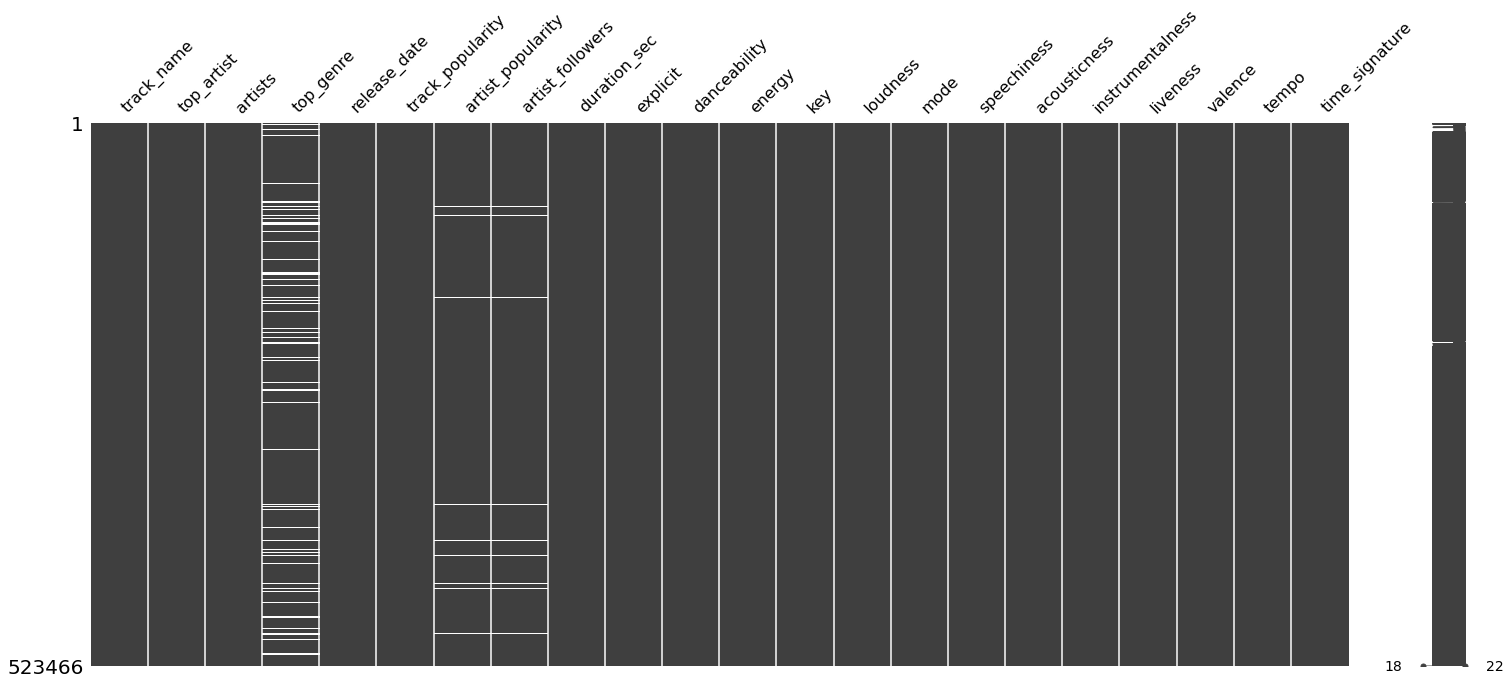

In [41]:
import missingno as msn

msn.matrix(df)

Nullity by column:

<Axes: >

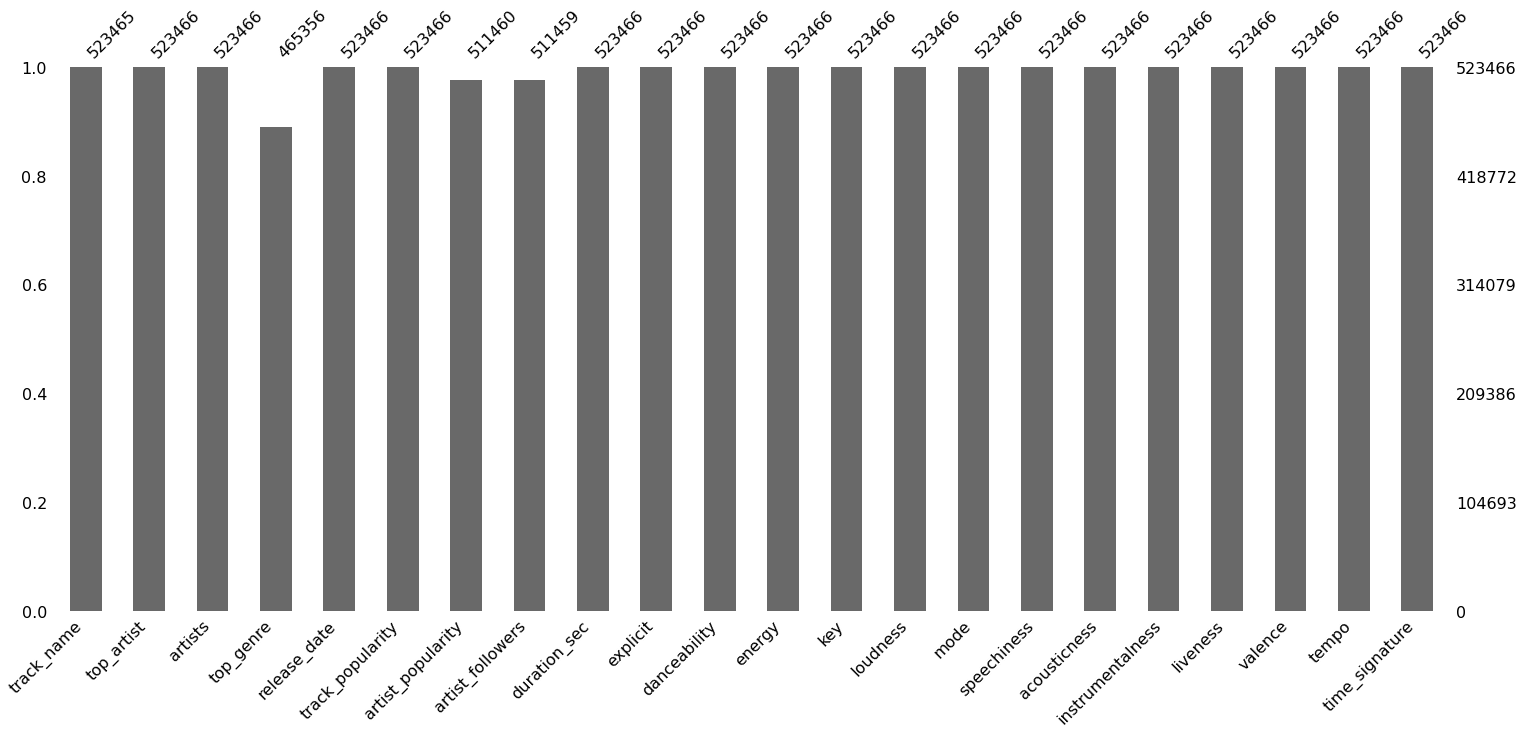

In [42]:
msn.bar(df)

Heatmap measuring nullity correlation comes in handy when we need to assess relationship between features in terms of nullity.
It's clear that artist_popularity and artists_followers are correlated 100% positively - data presence and absence are exactly
the same in both columns. Top_genre affects artist_popularity and artists_followers at the same level - 40% of data entries
are present in these both columns. However, from logical point of view lack of genre has no real impact on lack of artist 
or track data:

<Axes: >

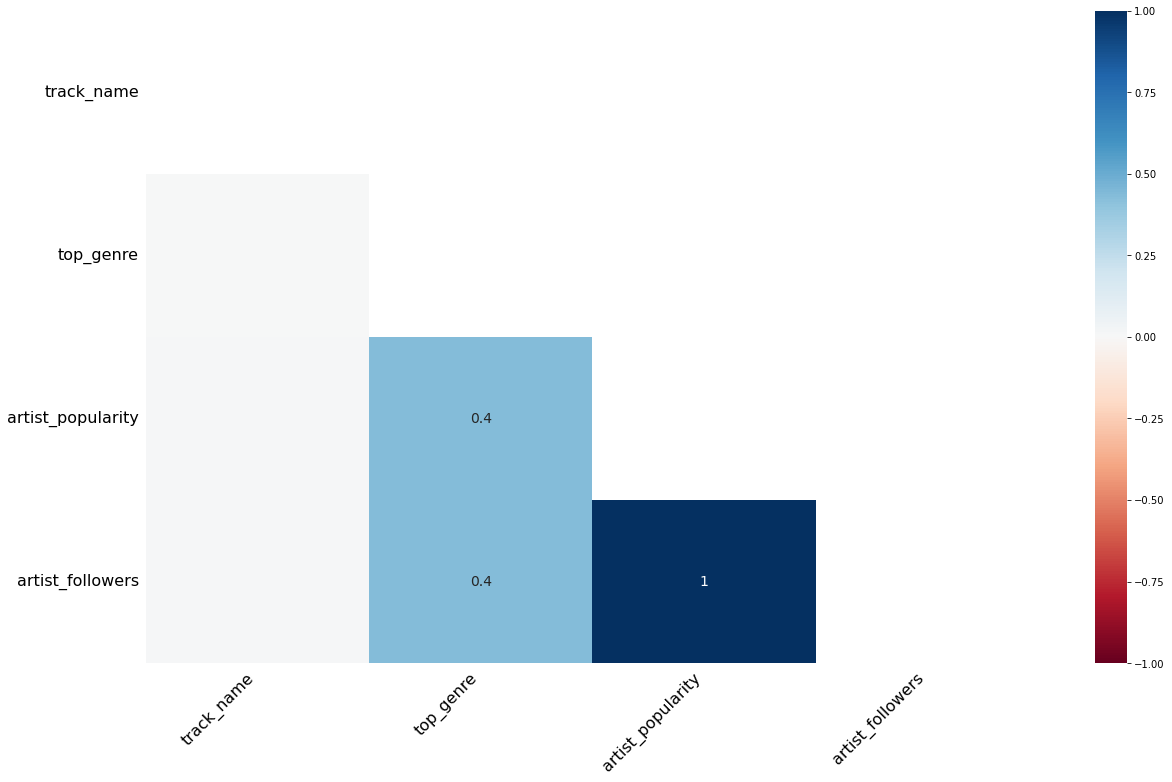

In [43]:
msn.heatmap(df)

We will make decision on what to do with missing values later on, in feature engineering part of this analysis.

#### 2.2 EDA - numerical features

##### Univariate 

Quick glimpse on dataframe data types:

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523466 entries, 264860 to 525238
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   track_name         523465 non-null  object        
 1   top_artist         523466 non-null  object        
 2   artists            523466 non-null  object        
 3   top_genre          465356 non-null  object        
 4   release_date       523466 non-null  datetime64[ns]
 5   track_popularity   523466 non-null  int64         
 6   artist_popularity  511460 non-null  float64       
 7   artist_followers   511459 non-null  float64       
 8   duration_sec       523466 non-null  float64       
 9   explicit           523466 non-null  int64         
 10  danceability       523466 non-null  float64       
 11  energy             523466 non-null  float64       
 12  key                523466 non-null  int64         
 13  loudness           523466 non-null  flo

Let's explore every single column:

In [45]:
df.describe()

track_popularity  artist_popularity  artist_followers   duration_sec  \
count     523466.000000      511460.000000      5.114590e+05  523466.000000   
mean          27.242944          49.633260      8.904255e+05     228.997355   
std           18.033169          19.774554      3.192671e+06     128.115417   
min            0.000000           0.000000      0.000000e+00       4.000000   
25%           13.000000          37.000000      1.040300e+04     173.610000   
50%           27.000000          51.000000      8.208000e+04     214.000000   
75%           40.000000          64.000000      5.244900e+05     263.240000   
max           99.000000         100.000000      7.890023e+07    5621.218000   

            explicit   danceability         energy            key  \
count  523466.000000  523466.000000  523466.000000  523466.000000   
mean        0.045143       0.564548       0.541644       5.220335   
std         0.207619       0.166091       0.251432       3.519273   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.454000       0.343000       2.000000   
50%         0.000000       0.579000       0.548000       5.000000   
75%         0.000000       0.687000       0.747000       8.000000   
max         1.000000       0.991000       1.000000      11.000000   

            loudness           mode    speechiness   acousticness  \
count  523466.000000  523466.000000  523466.000000  523466.000000   
mean      -10.230468       0.657132       0.109382       0.451266   
std         5.081441       0.474668       0.187931       0.347420   
min       -60.000000       0.000000       0.000000       0.000000   
25%       -12.913000       0.000000       0.034100       0.100000   
50%        -9.264000       1.000000       0.044600       0.427000   
75%        -6.511000       1.000000       0.078300       0.783000   
max         5.376000       1.000000       0.971000       0.996000   

       instrumentalness       liveness        valence          tempo  \
count     523466.000000  523466.000000  523466.000000  523466.000000   
mean           0.111643       0.215541       0.552998     118.451143   
std            0.264829       0.185975       0.257511      29.810878   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.000000       0.098600       0.347000      95.539000   
50%            0.000022       0.140000       0.565000     117.299000   
75%            0.008790       0.280000       0.770000     136.447750   
max            1.000000       1.000000       1.000000     246.381000   

       time_signature  
count   523466.000000  
mean         3.870740  
std          0.479663  
min          0.000000  
25%          4.000000  
50%          4.000000  
75%          4.000000  
max          5.000000

Let's visualize features using histograms with density curves. Axes.flat simplify indexing. Zip joins lists and creates
one list. We need to use histplot instead of displot here beacuse only histplot is axes-level function, displot is not 
(figure-level). We need to draw a random sample from our datset since it's too large to generate so many plots.
Distributions vary a lot for each feature:

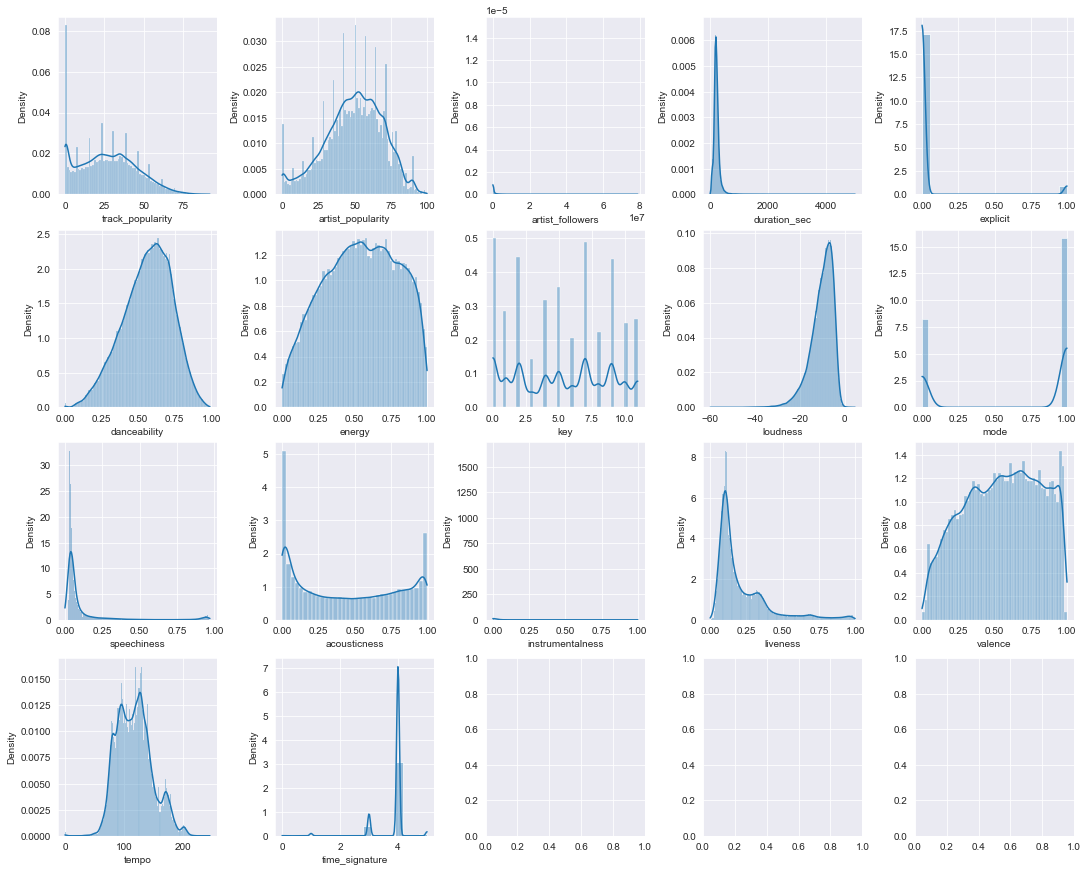

In [46]:
import statsmodels.api as sm
import scipy.stats as stats

sns.set_style("darkgrid")
num_cols = df.select_dtypes(include=np.number)
cols = num_cols.columns.tolist()
df_sample = df.sample(n=100000)

fig, axes = plt.subplots(4, 5, figsize=(15,12), layout = 'constrained')
for col, axs in zip(cols, axes.flat):
    sns.histplot(data = df_sample[col], kde = True, stat = 'density', ax = axs, alpha = .4)

plt.show()

Let's take a look at kurtosis and skewness.

Kurtosis - the greater the value (> 0) the more slim the distribution (and more outliers) and more values are similar
to each other. It also means that a lot of values revolve around mean value. The lower the value the flatter the
distribution is - it also means that values don't revolve around mean and are more spread (sparse). 

The highest kurtosis (tallest distribution): duration_sec, artist_followers, explicit, energy or speechiness.
Values are similar here. For the first glance normal distibution (between 1 and -1) is in tempo, artist_popularity and 
danceability columns:

In [47]:
df.agg('kurtosis').transpose().sort_values()

mode                  -1.561668
acousticness          -1.462628
key                   -1.266476
valence               -1.034276
energy                -0.960362
track_popularity      -0.618708
danceability          -0.265464
artist_popularity     -0.250617
tempo                 -0.065569
loudness               2.549181
instrumentalness       3.682584
liveness               4.187354
speechiness           11.976379
time_signature        16.298877
explicit              17.199119
artist_followers     139.285598
duration_sec         247.176247
dtype: float64

Skewness - the greater the value (> 0) the more right-skewed the distribution and more data is concentrated in lower values
Right-skewed: duration_sec, artist_followers, explicit etc. Quite symmetric (close to normal distribution, skew ~ 0):
energy, danceability, valence, artist_popularity, tempo:

In [48]:
df.agg('skew').transpose().sort_values()

time_signature       -3.198636
loudness             -1.217958
mode                 -0.662071
artist_popularity    -0.339982
danceability         -0.339032
valence              -0.154397
energy               -0.127875
key                  -0.002054
acousticness          0.141041
track_popularity      0.276135
tempo                 0.401550
liveness              2.029722
instrumentalness      2.298101
speechiness           3.525427
explicit              4.381672
artist_followers      9.919720
duration_sec         10.560966
dtype: float64

Let's now analyze numeric columns by specific data type: int

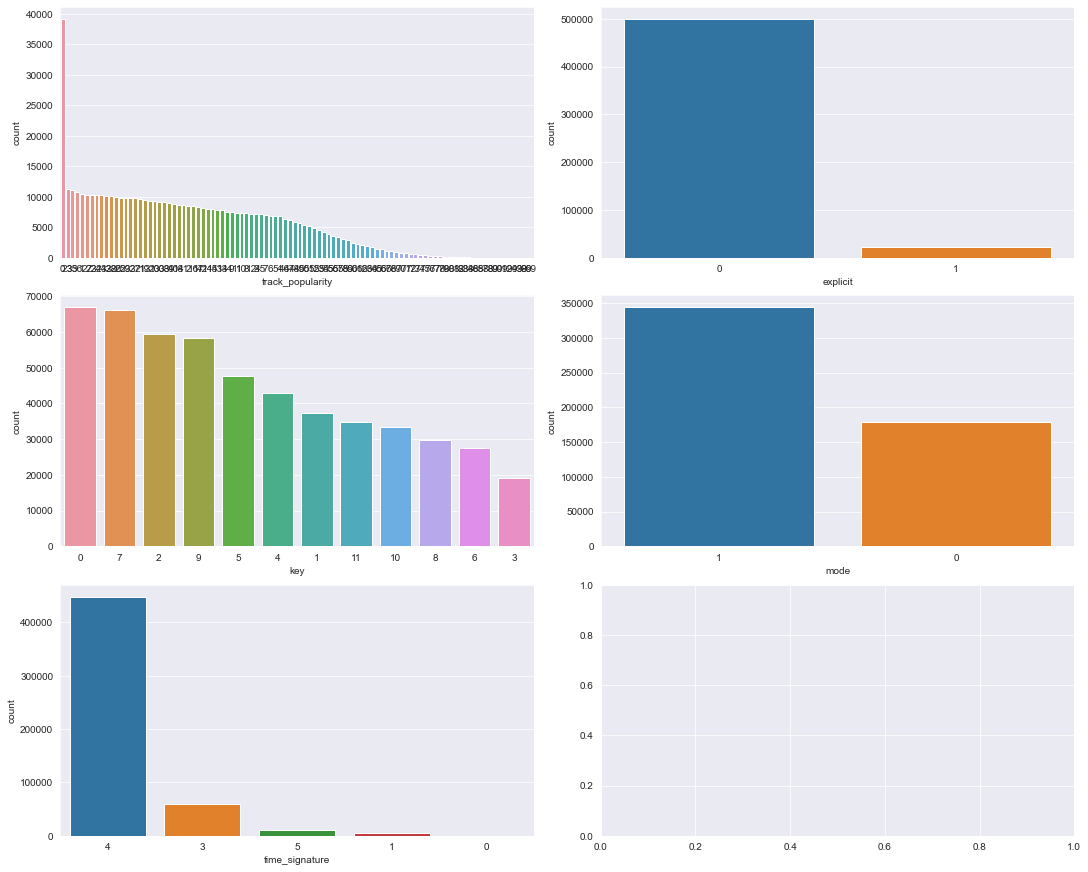

In [49]:
cols = df.select_dtypes(np.int64)
cols_names = cols.columns.tolist()

fig, axes = plt.subplots(3, 2, figsize=(15,12), layout = 'constrained')
for col, axs in zip(cols_names, axes.flat):
    sns.countplot(x=df[col], order=df[col].value_counts().index, ax=axs)

plt.show()

Excluding 'track_popularity' rest of int columns may be treated as categorical features since they have a few unique values.
We can convert those features into categorical ones. Since the list of possible values is pretty small and because there are 
a lot of repetitions, we could make this faster by using a category data type (except for track_popularity). Let's get back to
our original dataframe and data types. There are some object columns as potential candidates for categoricals. However, there
are a bunch of possible values for each of object features (e.g. artists) so we won't make it categorical:

In [50]:
cat_cols = ['explicit', 'key', 'mode', 'time_signature']

for col in cat_cols:
    df[col] = pd.Categorical(df[col])

Let's take a look at data types after casting:

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523466 entries, 264860 to 525238
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   track_name         523465 non-null  object        
 1   top_artist         523466 non-null  object        
 2   artists            523466 non-null  object        
 3   top_genre          465356 non-null  object        
 4   release_date       523466 non-null  datetime64[ns]
 5   track_popularity   523466 non-null  int64         
 6   artist_popularity  511460 non-null  float64       
 7   artist_followers   511459 non-null  float64       
 8   duration_sec       523466 non-null  float64       
 9   explicit           523466 non-null  category      
 10  danceability       523466 non-null  float64       
 11  energy             523466 non-null  float64       
 12  key                523466 non-null  category      
 13  loudness           523466 non-null  flo

##### Bivariate

*Numerical-Numerical*

We use pairplot to visualize relationship between numerical features. It helps in assessing where the correlation occurs.
This plot also shows us which features are good candidates for categoricals (vertical/horizontal dot-like lines on the plot).

We need to add alpha parameter to show areas where data is focused on the plot - it also allows us to assess correlation. 
The more data the lower alpha level. We can see correlation between some features but in this case it would be better to
show real numbers:

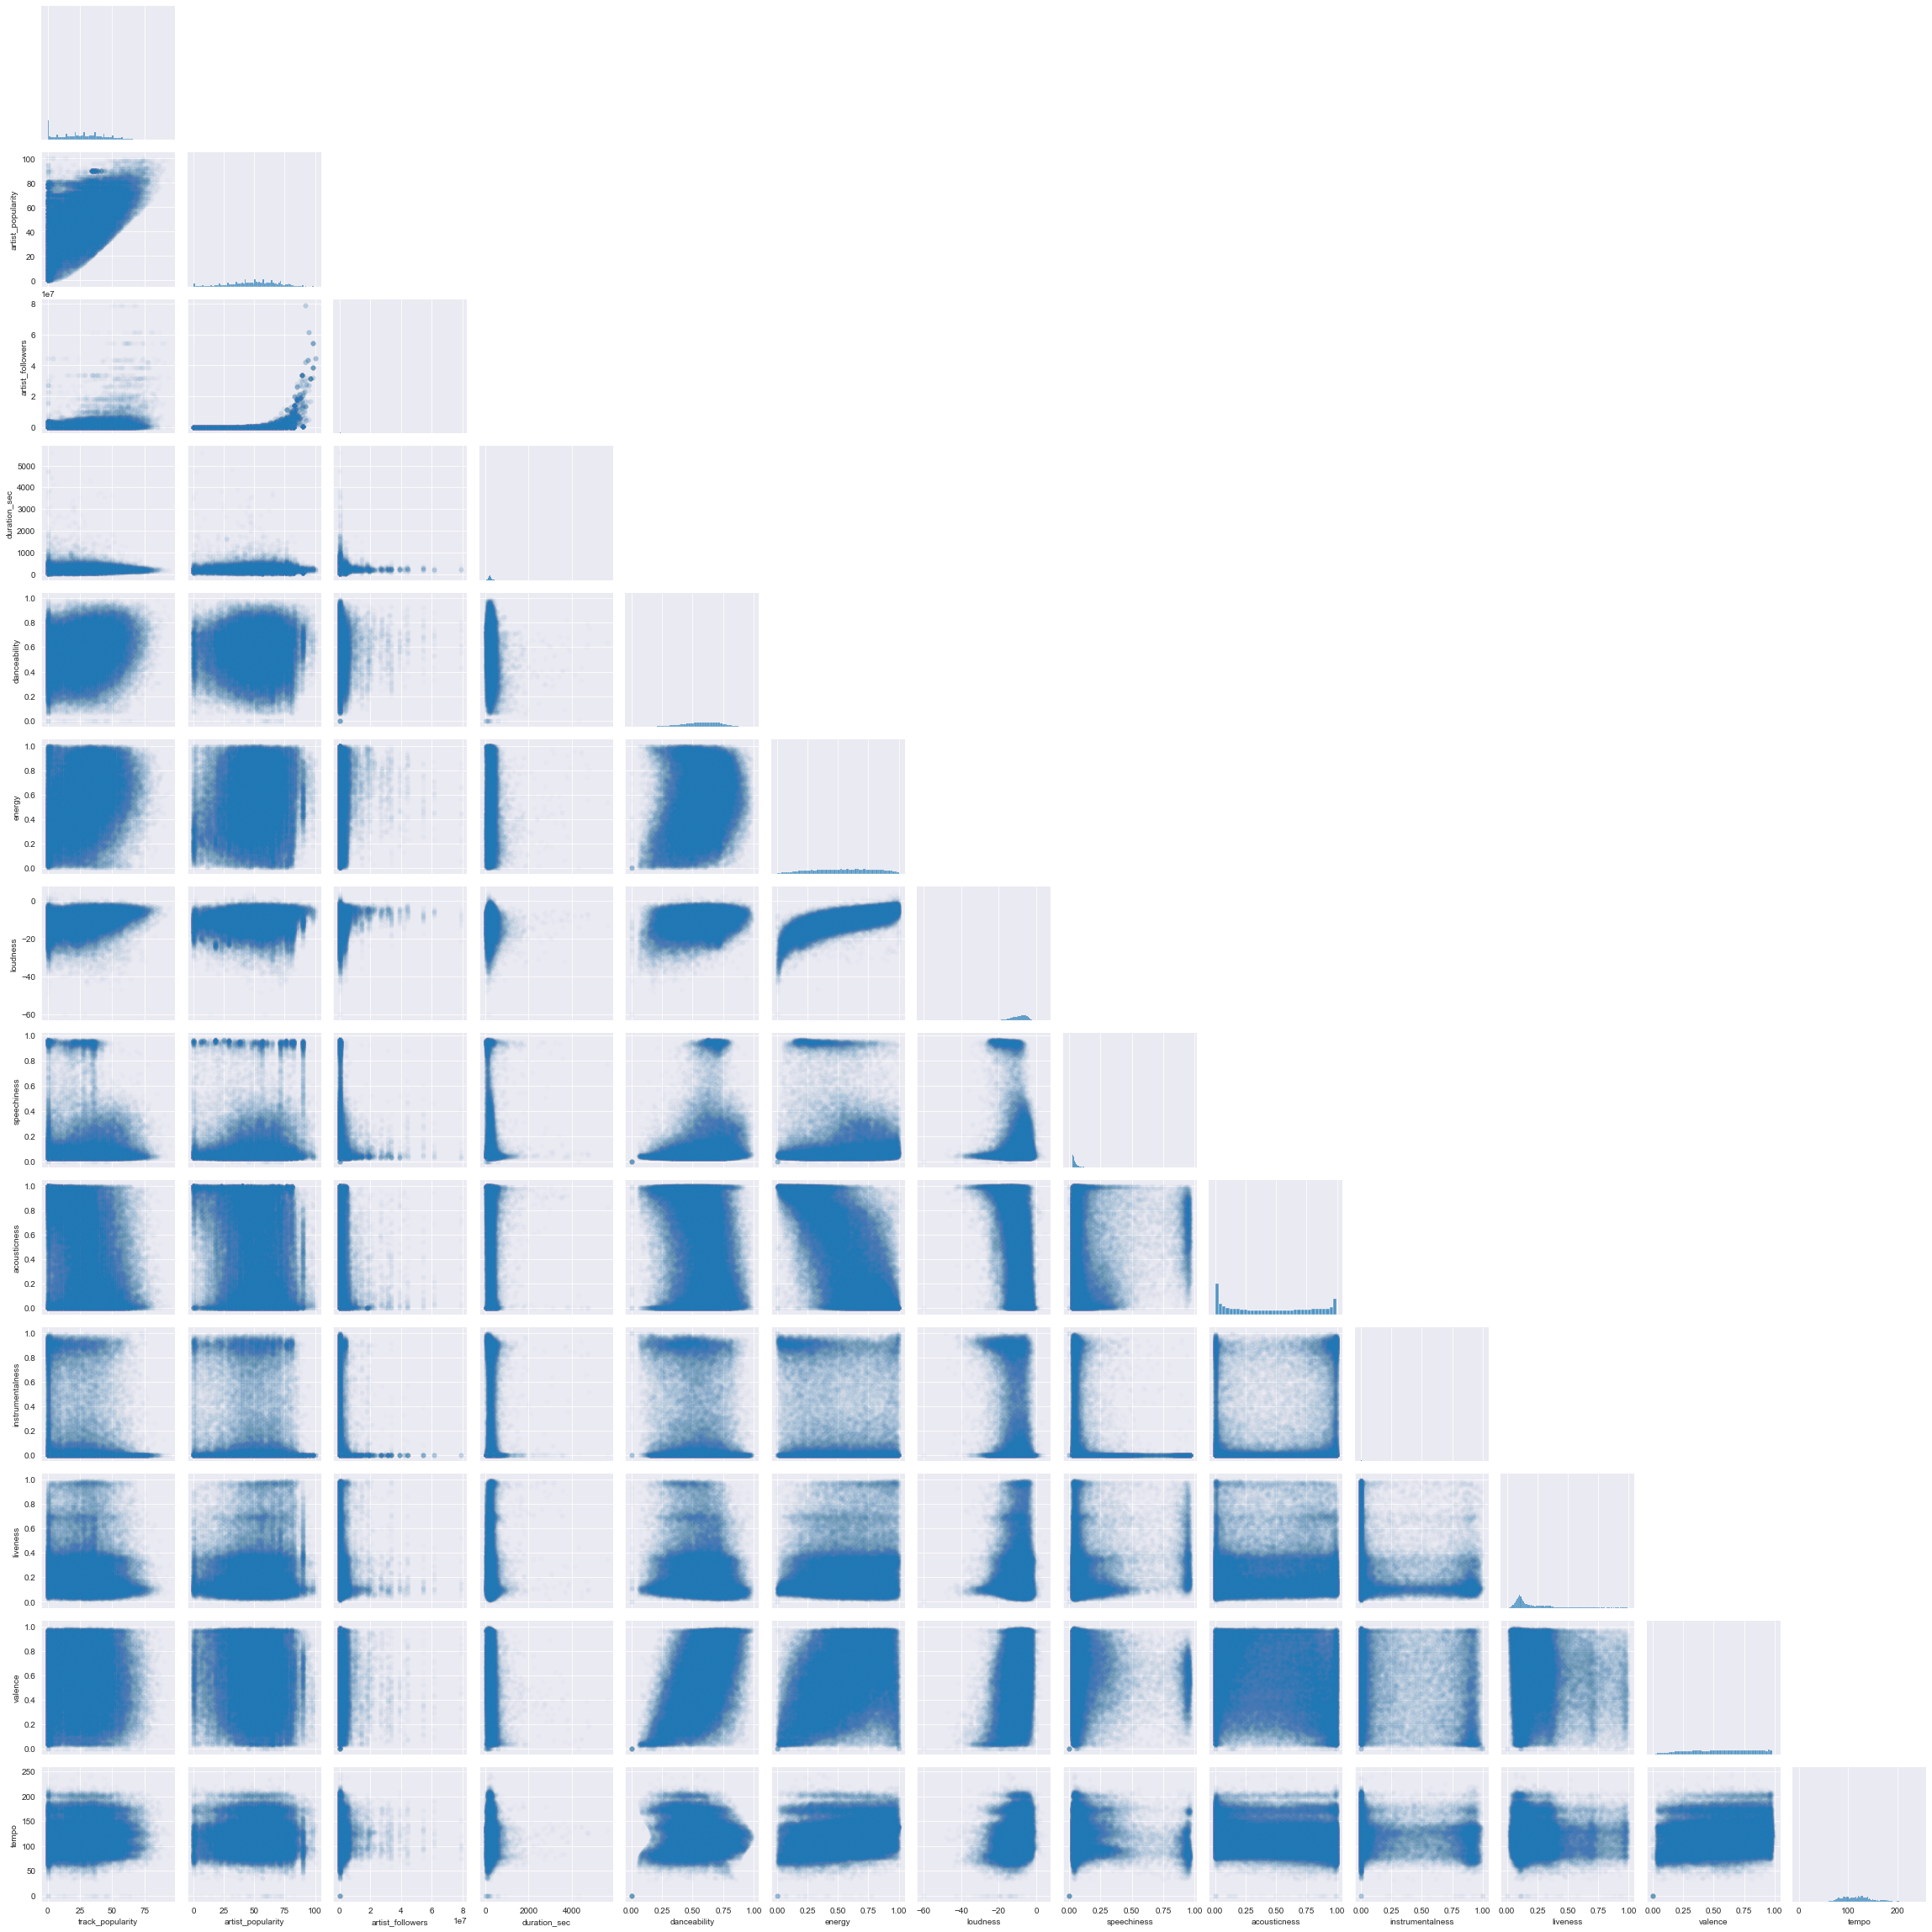

In [52]:
df_sample = df.sample(n=100000)
sns.pairplot(df_sample, corner=True, plot_kws={'alpha': 0.02})
plt.show()

Create correlation matrix to express relationship between numerical features in numbers:

In [53]:
pd.set_option('display.max_rows', 500)

corr_matrix = df.corr()
corr_matrix.unstack().sort_values()

energy             acousticness        -0.710622
acousticness       energy              -0.710622
                   loudness            -0.514381
loudness           acousticness        -0.514381
acousticness       track_popularity    -0.363475
track_popularity   acousticness        -0.363475
instrumentalness   loudness            -0.317796
loudness           instrumentalness    -0.317796
acousticness       danceability        -0.235495
danceability       acousticness        -0.235495
track_popularity   instrumentalness    -0.220959
instrumentalness   track_popularity    -0.220959
                   danceability        -0.219852
danceability       instrumentalness    -0.219852
acousticness       tempo               -0.193666
tempo              acousticness        -0.193666
energy             instrumentalness    -0.184831
instrumentalness   energy              -0.184831
loudness           speechiness         -0.180051
speechiness        loudness            -0.180051
valence            a

We notice that the highest negative correlation is between:
- energy and acousticness (-0.72)
- loudness and acousticness (-0.52)
Medium negative correlation between:
- instrumentalness and loudness (-0.33)
- acousticness and track_popularity (-0.37)

The highest positive correlation is between:
- energy and loudness (0.76)
- artist_popularity and track_popularity (0.53)
- danceability and valence (0.53)
Medium positive correlation between:
- artist_followers and artist_popularity (0.42)
- energy and valence (0.37)
- loudness and track_popularity (0.33) 
- energy and track_popularity (0.3) 

We can focus on those particular (and strong) relations and move analysis forward in this direction. Those features have the 
biggest impact on our analysis.

Let's use heatmap to display correlation matrix:

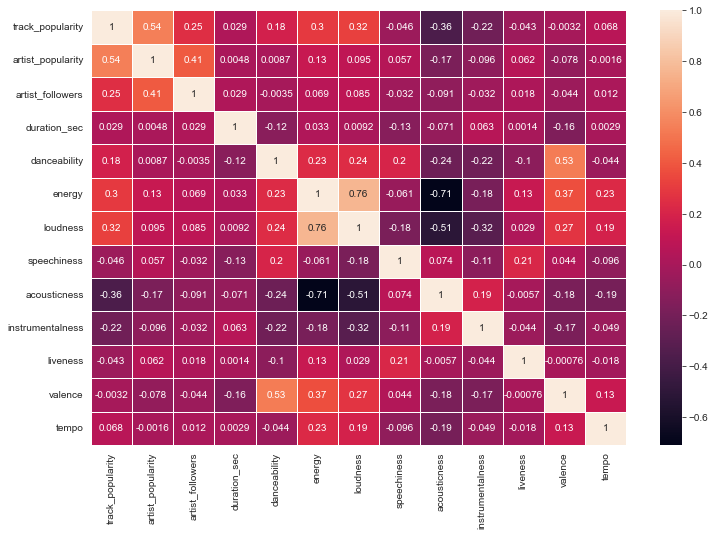

In [54]:
plt.figure(figsize=(12,8))

sns.heatmap(corr_matrix, annot=True, linewidths=0.8)
plt.show()

We calculated correlations between features above and noticed that some of them are more correlated than the others.
We can consider them as most significant in terms of further analysis and prospective ML modelling. Let's focus on some of 
those key fetaures and try to fit distribution to them:

In [55]:
from fitter import Fitter
from scipy import stats

distr = ['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'beta',
 'lognorm', 
 'logistic',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

Energy - based on SSE beta distribution is the best one:

Fitting 12 distributions: 100%|████████████████████████████████████████████████████████| 12/12 [00:30<00:00,  2.50s/it]


sumsquare_error        aic           bic    kl_div  ks_statistic  \
beta             0.513010  20.487453 -7.242459e+06  0.002731      0.007696   
exponpow         3.144444  35.166407 -6.293378e+06  0.018221      0.035478   
powerlaw         4.664452  12.124418 -6.086958e+06  0.026616      0.060914   
gamma            5.950263  48.184532 -5.959512e+06  0.034686      0.046257   
norm             5.999128  46.219998 -5.955244e+06  0.035033      0.045734   

             ks_pvalue  
beta      2.329377e-27  
exponpow  0.000000e+00  
powerlaw  0.000000e+00  
gamma     0.000000e+00  
norm      0.000000e+00

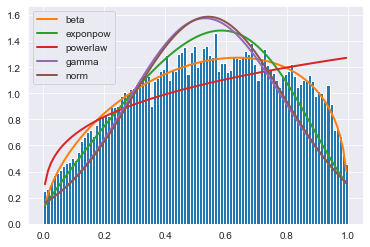

In [56]:
dist_fitter =  Fitter(df['energy'], distributions=distr)
dist_fitter.fit()
dist_fitter.summary()

Loudness - based on SSE logistic distribution is the best one:

Fitting 12 distributions: 100%|████████████████████████████████████████████████████████| 12/12 [00:30<00:00,  2.50s/it]


sumsquare_error          aic           bic    kl_div  ks_statistic  \
logistic         0.006610  1762.281082 -9.520452e+06       inf      0.063116   
norm             0.008587  3022.149561 -9.383457e+06       inf      0.076203   
cauchy           0.011129  1141.937295 -9.247742e+06       inf      0.122282   
gamma            0.011395  3861.241520 -9.235383e+06       inf      0.096353   
rayleigh         0.021854          inf -8.894493e+06  0.285246      0.195966   

          ks_pvalue  
logistic        0.0  
norm            0.0  
cauchy          0.0  
gamma           0.0  
rayleigh        0.0

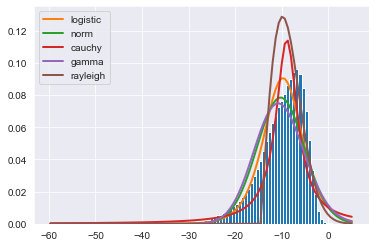

In [57]:
dist_fitter =  Fitter(df['loudness'], distributions=distr)
dist_fitter.fit()
dist_fitter.summary()

Danceability - based on SSE beta distribution is the best one:

Fitting 12 distributions: 100%|████████████████████████████████████████████████████████| 12/12 [00:30<00:00,  2.50s/it]


sumsquare_error         aic           bic  kl_div  ks_statistic  \
beta             0.689206  149.546894 -7.087909e+06     inf      0.010501   
exponpow         0.915844  149.355117 -6.939097e+06     inf      0.017895   
norm             3.238687  142.667706 -6.277932e+06     inf      0.036317   
gamma            4.273469  147.323282 -6.132784e+06     inf      0.042904   
logistic         4.322390  126.889137 -6.126839e+06     inf      0.029933   

              ks_pvalue  
beta       1.456585e-50  
exponpow  4.757485e-146  
norm       0.000000e+00  
gamma      0.000000e+00  
logistic   0.000000e+00

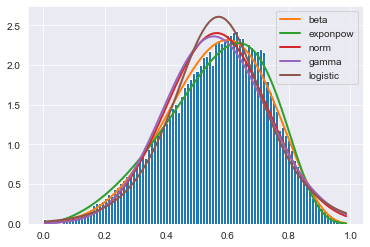

In [58]:
dist_fitter =  Fitter(df['danceability'], distributions=distr)
dist_fitter.fit()
dist_fitter.summary()

*Numerical-Categorical*

We have a few categorical features which can be displayed on boxplots. Explicit refers to explicit content (0/1 - no explicit/
explicit content). We can measure it in terms of other numeric columns:

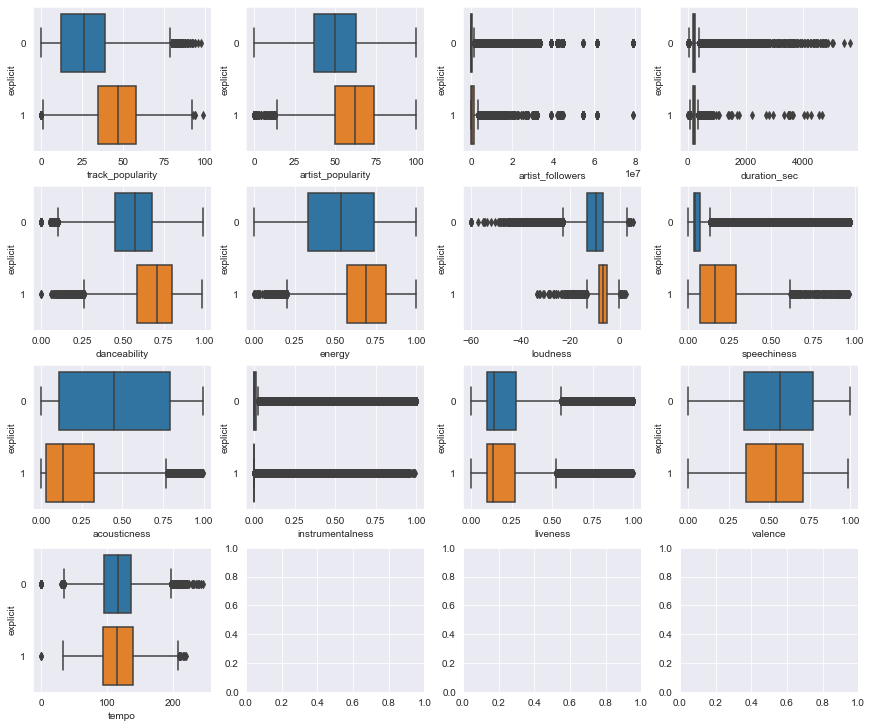

In [59]:
num_cols = df.select_dtypes(np.number)
cols_names = num_cols.columns.tolist()

fig, axes = plt.subplots(4,4, figsize=(12,10), layout='constrained')
for col, axs in zip(cols_names, axes.flat):
    sns.boxplot(x=df[col], y=df["explicit"], ax=axs)
plt.show()

As we can see above the greatest difference between groups is for features: track_popularity (seems the more 
explicit content the more popular track, same for artist_popularity), danceability, energy (kind of). It's also quite obvious
that for accousticness the explicit content is rather marginal and that for speechiness there is greater range of explicit box since 
we have words in a song.

Now we can do a preliminary feature engineering and extract year from date column. That will be our new feature 
for which we create box plots. Let's make it categorical as well:

In [60]:
df['song_year'] = df['release_date'].dt.year
df['song_year'] = pd.Categorical(df['song_year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523466 entries, 264860 to 525238
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   track_name         523465 non-null  object        
 1   top_artist         523466 non-null  object        
 2   artists            523466 non-null  object        
 3   top_genre          465356 non-null  object        
 4   release_date       523466 non-null  datetime64[ns]
 5   track_popularity   523466 non-null  int64         
 6   artist_popularity  511460 non-null  float64       
 7   artist_followers   511459 non-null  float64       
 8   duration_sec       523466 non-null  float64       
 9   explicit           523466 non-null  category      
 10  danceability       523466 non-null  float64       
 11  energy             523466 non-null  float64       
 12  key                523466 non-null  category      
 13  loudness           523466 non-null  flo

Let's visualize how most significant features have changed over the more than a century:

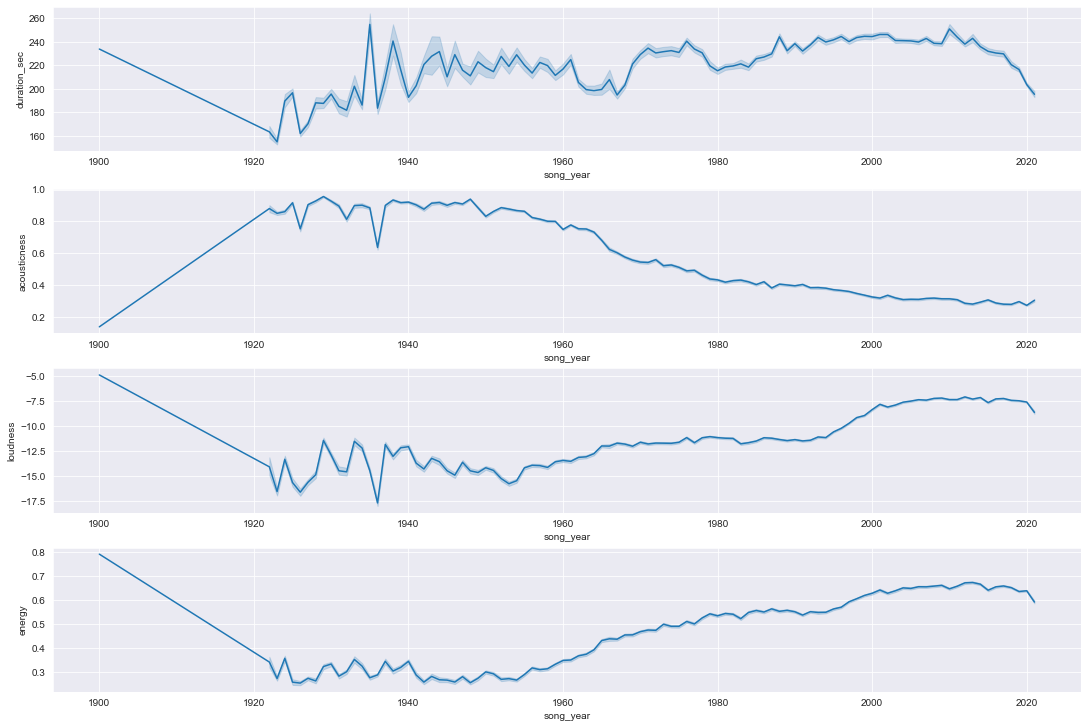

In [61]:
cols_names = ['duration_sec', 'acousticness', 'loudness', 'energy']

fig, axes = plt.subplots(4,1, figsize=(15,10), layout='constrained')
for col, axs in zip(cols_names, axes.flat):
    sns.lineplot(x=df['song_year'], y=df[col], ax=axs)
plt.show()

We can clearly see that song duration has increased greatly, same for energy and loudness. The last two had been on increase
since 60's Accousticness has been on decrease since 50's. This is most likely the result of a new wave of rock'n roll music,
louder and definitely more energetic. Now let's go into more details and analyze all numerical features using boxplots:

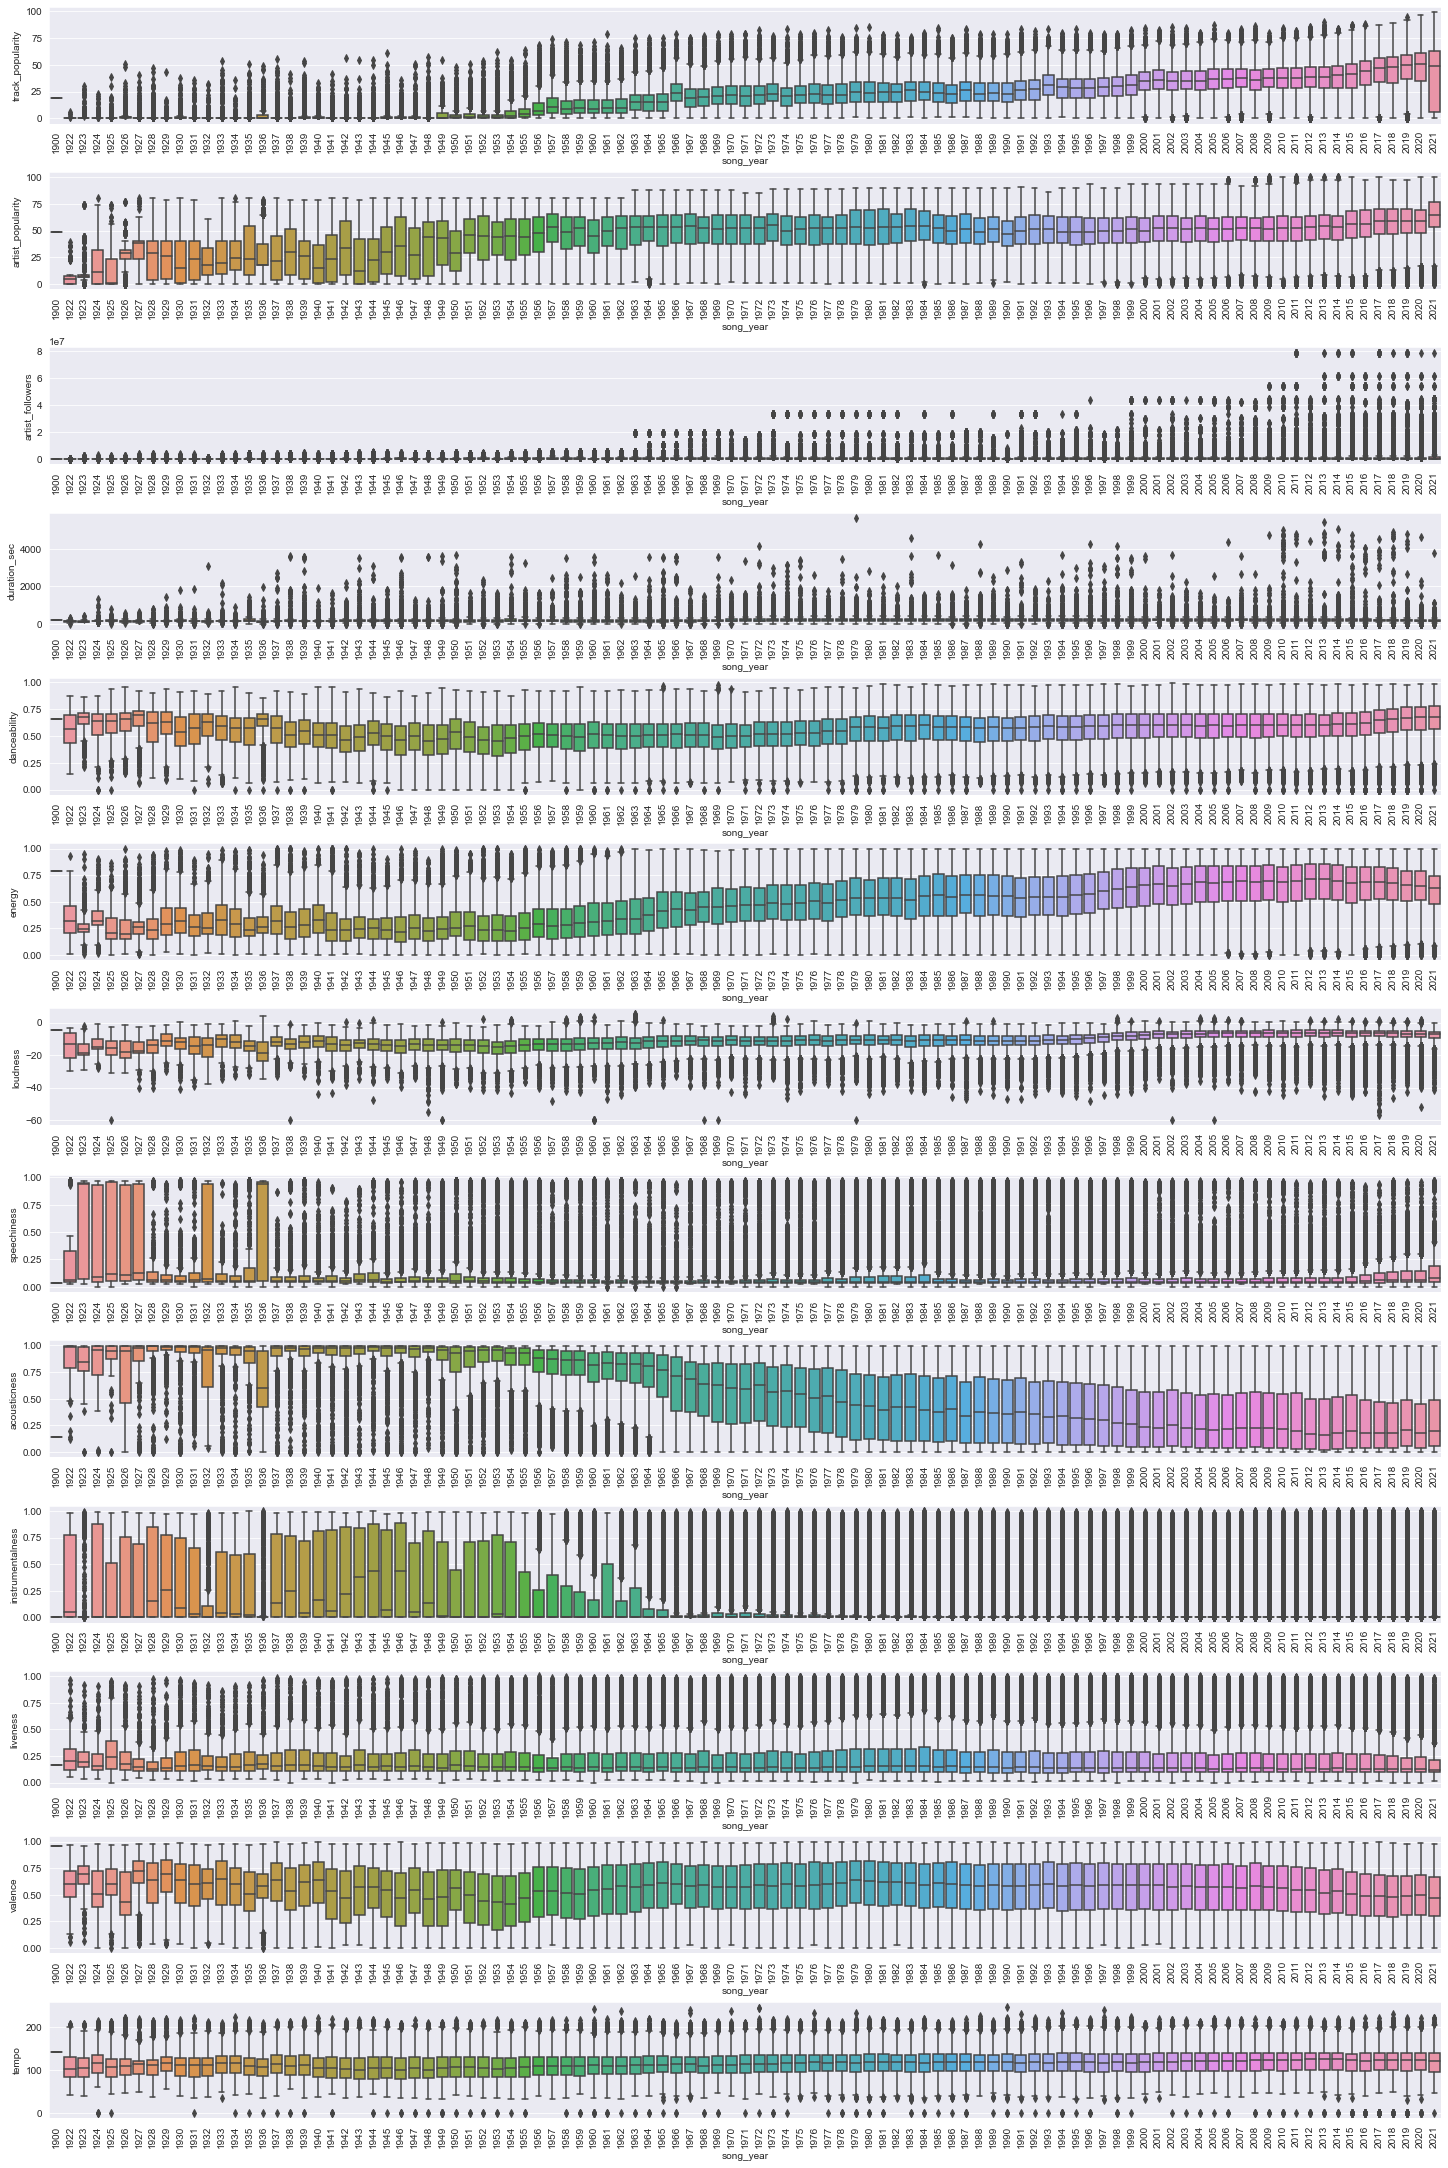

In [62]:
num_cols = df.select_dtypes(np.number)
cols_names = num_cols.columns.tolist()

fig, axes = plt.subplots(13,1, figsize=(20,30), layout='constrained')

for col, axs in zip(cols_names, axes.flat):
    sns.boxplot(x=df["song_year"], y=df[col], ax=axs)
    axs.tick_params(axis='x', rotation=90)
plt.show()

These plots are very interesting. We can clearly see how particular features have changed over years. Track popularity has increased
which is quite obvious from today's perspective. Energy is also on increase, it has changed remarkably in '60s. Speechiness is also really high in the
beginning of a century, then sharply decreases. Accousticness - in the beginning of a century most songs were acoustic and it
has changed a lot over the years. Up until '60s most songs were instrumental, then it changed abruptly. It has a lot to do
with rock 'n roll revolution. 

Boxplots also show how values range for particular years. Take acousticness and see that in the 
beginning of XX century almost all songs were very acoustic. It had changed with rock'n roll revolution - tracks started varying
a lot. It worked the other way round regarding instrumentalness - the same period of time and extremely low feature level
comparing to 1900-1960. And of course there are a lot of outliers for each feature.

#### 2.3 EDA - categorical features

##### Univariate

Now choose and analyze categorical data:

In [63]:
df_cat = df.select_dtypes(exclude=np.number)
df_cat.describe()

track_name    top_artist           artists        top_genre  \
count       523465        523466            523466           465356   
unique      446474         70433            113184             3623   
top     Summertime  Die drei ???  ['Die drei ???']  adult standards   
freq            82          3856              3856            21874   
first          NaN           NaN               NaN              NaN   
last           NaN           NaN               NaN              NaN   

               release_date  explicit       key      mode  time_signature  \
count                523466  523466.0  523466.0  523466.0        523466.0   
unique                19155       2.0      12.0       2.0             5.0   
top     1997-01-01 00:00:00       0.0       0.0       1.0             4.0   
freq                   5107  499835.0   66939.0  343986.0        447727.0   
first   1900-01-01 00:00:00       NaN       NaN       NaN             NaN   
last    2021-04-16 00:00:00       NaN       NaN       NaN             NaN   

        song_year  
count    523466.0  
unique      101.0  
top        2020.0  
freq      13079.0  
first         NaN  
last          NaN

Now check our table with most frequent category in each year. We can see that we have an array in year 1993. Why? Because
we have 2 categories with the same frequency (126). That's why they are bind together into one array. We can replace one of
those values to another one, then we would have one more top_genre (127, not 126) in given category. After that operation we will have one category per year:

In [64]:
most_freq_cat = df.groupby('song_year')['top_genre'].agg(pd.Series.mode).to_frame().reset_index()
most_freq_cat

song_year                       top_genre
0        1900                 cumbia ranchera
1        1922                    vintage jazz
2        1923                    vintage jazz
3        1924                        big band
4        1925                           tango
5        1926                           tango
6        1927                           tango
7        1928                           tango
8        1929                           tango
9        1930                           tango
10       1931                           tango
11       1932                           tango
12       1933                           tango
13       1934                        big band
14       1935                       classical
15       1936                         reading
16       1937                 adult standards
17       1938                 adult standards
18       1939                        big band
19       1940                        rebetiko
20       1941                       classical
21       1942                       classical
22       1943               classic bollywood
23       1944               classic bollywood
24       1945                       classical
25       1946                       classical
26       1947                       classical
27       1948                       classical
28       1949                       classical
29       1950                       classical
30       1951                       classical
31       1952                       classical
32       1953                       classical
33       1954                       classical
34       1955                 adult standards
35       1956                 adult standards
36       1957                 adult standards
37       1958                 adult standards
38       1959                 adult standards
39       1960                 adult standards
40       1961                 adult standards
41       1962                 adult standards
42       1963                 adult standards
43       1964                 adult standards
44       1965                 adult standards
45       1966                 adult standards
46       1967                 adult standards
47       1968                 adult standards
48       1969                      album rock
49       1970                      album rock
50       1971                      album rock
51       1972                      album rock
52       1973                      album rock
53       1974                      album rock
54       1975                      album rock
55       1976                      album rock
56       1977                      album rock
57       1978                      album rock
58       1979                      album rock
59       1980                       hoerspiel
60       1981                       hoerspiel
61       1982                      album rock
62       1983                       hoerspiel
63       1984                       hoerspiel
64       1985                       hoerspiel
65       1986                       hoerspiel
66       1987                      album rock
67       1988                      album rock
68       1989                           c-pop
69       1990                      album rock
70       1991                       hoerspiel
71       1992                       hoerspiel
72       1993  [classic bollywood, hoerspiel]
73       1994                       hoerspiel
74       1995                       hoerspiel
75       1996                       hoerspiel
76       1997                       hoerspiel
77       1998                       hoerspiel
78       1999                       hoerspiel
79       2000                           c-pop
80       2001                           c-pop
81       2002                           c-pop
82       2003                           c-pop
83       2004                           j-pop
84       2005                           j-pop
85       2006                           latin
86

For clarity - these 2 categories are most frequent:

In [65]:
df[df['song_year']==1993]['top_genre'].value_counts().sort_values(ascending=False)

classic bollywood        126
hoerspiel                126
classic icelandic pop    110
c-pop                    102
classic indo pop          97
                        ... 
comic metal                1
classic k-pop              1
brega                      1
pub rock                   1
classic korean pop         1
Name: top_genre, Length: 605, dtype: int64

Let's replace 'hoerspiel' genre into 'classic bollywood' in 1993. Now, 'classic bollywood' outnumbers 'hoerspiel' genre:

In [66]:
df[(df['song_year'] == 1993) & (df['top_genre'] == 'hoerspiel')]

track_name       top_artist  \
497086  Kapitel 01 - Alle lieben Knuddel (Folge 016)    Bibi und Tina   
497073   Kapitel 01 - Das Herbst-Turnier (Folge 017)    Bibi und Tina   
432390      Kapitel 01 - Der blaue Brief (Folge 057)  Bibi Blocksberg   
329884        Kapitel 01 - Der rote Hahn (Folge 015)    Bibi und Tina   
497134      Kapitel 01 - und das Dino-Ei (Folge 058)  Bibi Blocksberg   
497095  Kapitel 02 - Alle lieben Knuddel (Folge 016)    Bibi und Tina   
497074   Kapitel 02 - Das Herbst-Turnier (Folge 017)    Bibi und Tina   
447421      Kapitel 02 - Der blaue Brief (Folge 057)  Bibi Blocksberg   
329890        Kapitel 02 - Der rote Hahn (Folge 015)    Bibi und Tina   
497138      Kapitel 02 - und das Dino-Ei (Folge 058)  Bibi Blocksberg   
497097  Kapitel 03 - Alle lieben Knuddel (Folge 016)    Bibi und Tina   
497076   Kapitel 03 - Das Herbst-Turnier (Folge 017)    Bibi und Tina   
447426      Kapitel 03 - Der blaue Brief (Folge 057)  Bibi Blocksberg   
329894        Kapitel 03 - Der rote Hahn (Folge 015)    Bibi und Tina   
497139      Kapitel 03 - und das Dino-Ei (Folge 058)  Bibi Blocksberg   
497096  Kapitel 04 - Alle lieben Knuddel (Folge 016)    Bibi und Tina   
497077   Kapitel 04 - Das Herbst-Turnier (Folge 017)    Bibi und Tina   
432392      Kapitel 04 - Der blaue Brief (Folge 057)  Bibi Blocksberg   
329897        Kapitel 04 - Der rote Hahn (Folge 015)    Bibi und Tina   
497140      Kapitel 04 - und das Dino-Ei (Folge 058)  Bibi Blocksberg   
497100  Kapitel 05 - Alle lieben Knuddel (Folge 016)    Bibi und Tina   
497078   Kapitel 05 - Das Herbst-Turnier (Folge 017)    Bibi und Tina   
432394      Kapitel 05 - Der blaue Brief (Folge 057)  Bibi Blocksberg   
329898        Kapitel 05 - Der rote Hahn (Folge 015)    Bibi und Tina   
497141      Kapitel 05 - und das Dino-Ei (Folge 058)  Bibi Blocksberg   
497102  Kapitel 06 - Alle lieben Knuddel (Folge 016)    Bibi und Tina   
497079   Kapitel 06 - Das Herbst-Turnier (Folge 017)    Bibi und Tina   
432396      Kapitel 06 - Der blaue Brief (Folge 057)  Bibi Blocksberg   
497053        Kapitel 06 - Der rote Hahn (Folge 015)    Bibi und Tina   
497143      Kapitel 06 - und das Dino-Ei (Folge 058)  Bibi Blocksberg   
497106  Kapitel 07 - Alle lieben Knuddel (Folge 016)    Bibi und Tina   
497080   Kapitel 07 - Das Herbst-Turnier (Folge 017)    Bibi und Tina   
432395      Kapitel 07 - Der blaue Brief (Folge 057)  Bibi Blocksberg   
497054        Kapitel 07 - Der rote Hahn (Folge 015)    Bibi und Tina   
497144      Kapitel 07 - und das Dino-Ei (Folge 058)  Bibi Blocksberg   
497107  Kapitel 08 - Alle lieben Knuddel (Folge 016)    Bibi und Tina   
497081   Kapitel 08 - Das Herbst-Turnier (Folge 017)    Bibi und Tina   
447425      Kapitel 08 - Der blaue Brief (Folge 057)  Bibi Blocksberg   
497055        Kapitel 08 - Der rote Hahn (Folge 015)    Bibi und Tina   
497146      Kapitel 08 - und das Dino-Ei (Folge 058)  Bibi Blocksberg   
497109  Kapitel 09 - Alle lieben Knuddel (Folge 016)    Bibi und Tina   
497082   Kapitel 09 - Das Herbst-Turnier (Folge 017)    Bibi und Tina   
447422      Kapitel 09 - Der blaue Brief (Folge 057)  Bibi Blocksberg   
497056        Kapitel 09 - Der rote Hahn (Folge 015)    Bibi und Tina   
497145      Kapitel 09 - und das Dino-Ei (Folge 058)  Bibi Blocksberg   
497111  Kapitel 10 - Alle lieben Knuddel (Folge 016)    Bibi und Tina   
497083   Kapitel 10 - Das Herbst-Turnier (Folge 017)    Bibi und Tina   
432402      Kapitel 10 - Der blaue Brief (Folge 057)  Bibi Blocksberg   
497057        Kapitel 10 - Der rote Hahn (Folge 015)    Bibi und Tina   
497147      Kapitel 10 - und das Dino-Ei (Folge 058)  Bibi Blocksberg   
497112  Kapitel 11 - Alle lieben Knuddel (Folge 016)    Bibi und Tina   
497084   Kapitel 11 - Das Herbst-Turnier (Folge 017)    Bibi und Tina   
432399      Kapitel 11 - Der blaue Brief (Folge 057)  Bibi Blocksberg   
497058        Kapitel 11 - Der rote Hahn (Folge 015)    Bibi und Tina   
497149      Kapitel 11 - un

Choose random row with 'hoerspiel' as top_genre and replace this field. Then check if it's replaced correctly:

In [67]:
df.loc[432390, ['top_genre']] = ['classic bollywood']
df.loc[432390]

track_name           Kapitel 01 - Der blaue Brief (Folge 057)
top_artist                                    Bibi Blocksberg
artists                                   ['Bibi Blocksberg']
top_genre                                   classic bollywood
release_date                              1993-01-01 00:00:00
track_popularity                                           34
artist_popularity                                        82.0
artist_followers                                     128057.0
duration_sec                                           94.312
explicit                                                    0
danceability                                            0.666
energy                                                  0.269
key                                                         0
loudness                                               -18.03
mode                                                        1
speechiness                                             0.951
acoustic

Let's analyze top_genre. We see that adult_standards, album_rock, hoerspiel and classical genres were the most popular 
over the years. We see that these 4 were popular for more than 55% of all years (more than 60 years):

top_genre          top_genre        
adult standards    adult standards      0.168317
album rock         album rock           0.148515
hoerspiel          hoerspiel            0.138614
classical          classical            0.128713
dance pop          dance pop            0.089109
tango              tango                0.089109
c-pop              c-pop                0.059406
latin              latin                0.039604
big band           big band             0.029703
classic bollywood  classic bollywood    0.029703
j-pop              j-pop                0.019802
vintage jazz       vintage jazz         0.019802
cumbia ranchera    cumbia ranchera      0.009901
k-pop              k-pop                0.009901
reading            reading              0.009901
rebetiko           rebetiko             0.009901
Name: top_genre, dtype: float64

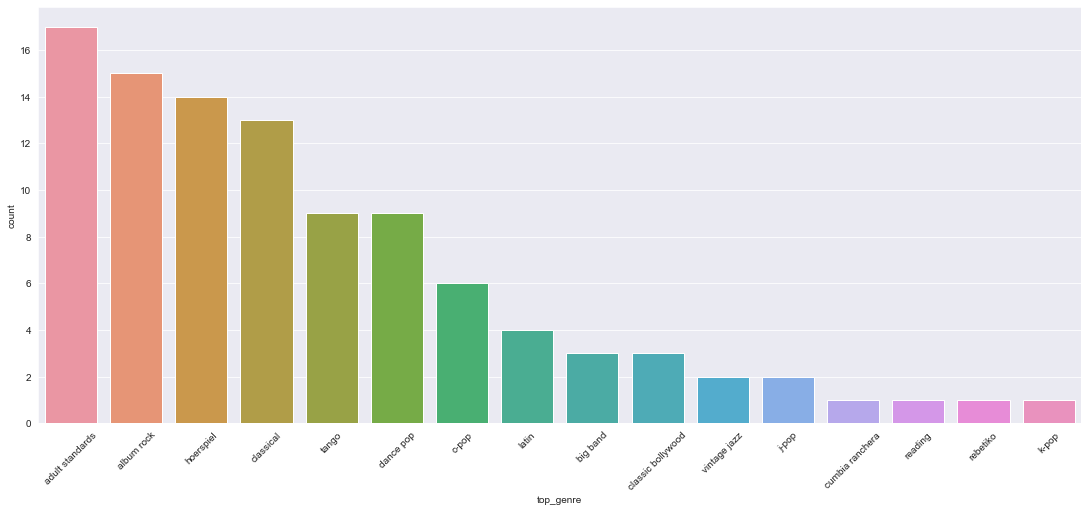

In [68]:
most_freq_cat = df.groupby('song_year')['top_genre'].agg(pd.Series.mode).to_frame().reset_index()

plt.figure(figsize=(15,7), layout='constrained')
plt.xticks(rotation=45)
sns.countplot(data=most_freq_cat, x='top_genre',order=most_freq_cat['top_genre'].value_counts().index)

most_freq_cat.groupby('top_genre')['top_genre'].value_counts().sort_values(ascending=False)/len(most_freq_cat)

##### Multivariate

We have previosuly detected relationships between some numeric variables and shown how they are distributed throughout the years
on boxplots. Energy and accousticness are interesting cases, we see how they correlate with other features and how the have
changed over the years. Let's see how the features' mean values are distributed in reference to two categorical features - song_year and top_genre:

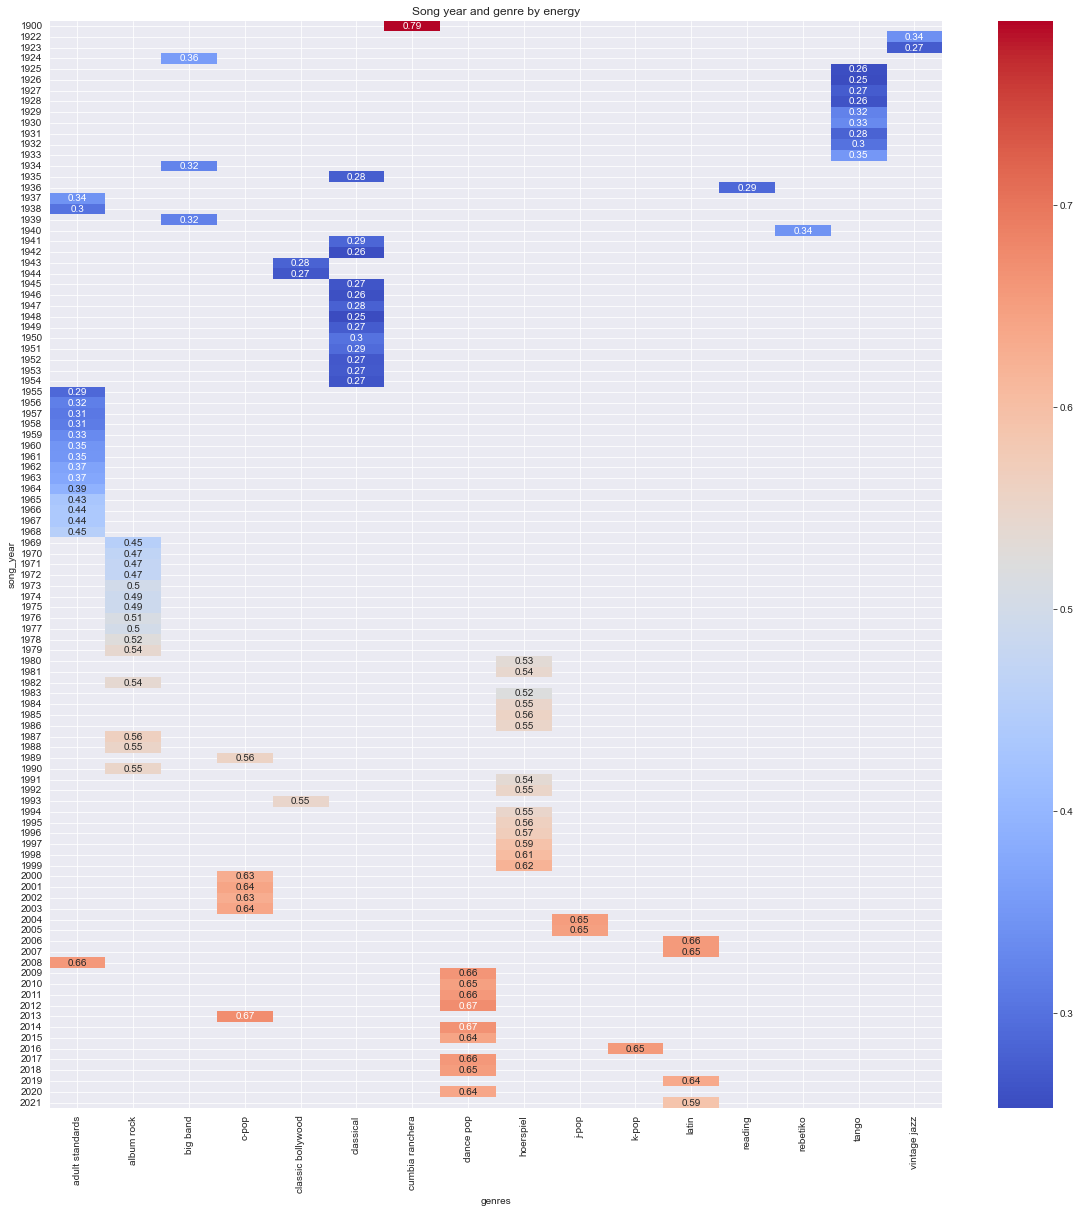

In [69]:
aggregates = df.groupby('song_year').agg(
    genres = ('top_genre', pd.Series.mode),
    energy = ('energy', np.mean),
    acousticness = ('acousticness', np.mean)    
)

pivot_energy = pd.pivot_table(data=aggregates, index='song_year', columns='genres', values='energy')

plt.figure(figsize=(20,20))

sns.heatmap(pivot_energy, annot=True, cmap='coolwarm')
plt.title('Song year and genre by energy')
plt.show()

This heatmap shows us many interesting things. First of all it shows us graphically how top genres were distributed over the
years - in which years they were popular and when they stopped to be popular. Secondly, how the core numeric feature (energy)
has changed in years of given genre popularity. Thirdly, heatmap shows us general tendency and patterns in music industry
over the years.

For energy we can see that adult standards, classical, tango and rock music genres were popular for many following years.
For example, tango was popular 9 years in a row. Also pop music was very popular at the time (blank years are filled with
very similar k-pop and c-pop). Looking at mentioned genres we can also see how energy changed during genre's popularity 
period. For example adult standards increased from 0.29 to 0.45, rock from 0.45 to 0.54. Overall impression is that energy has
increased dramatically from the beginning of a century. We also see the huge popularity of rock music in late 60's and 70's
which is easily explainable - this is the period in time when rock'n roll started becoming very popular type of music.

Now let's do the same for accousticness:

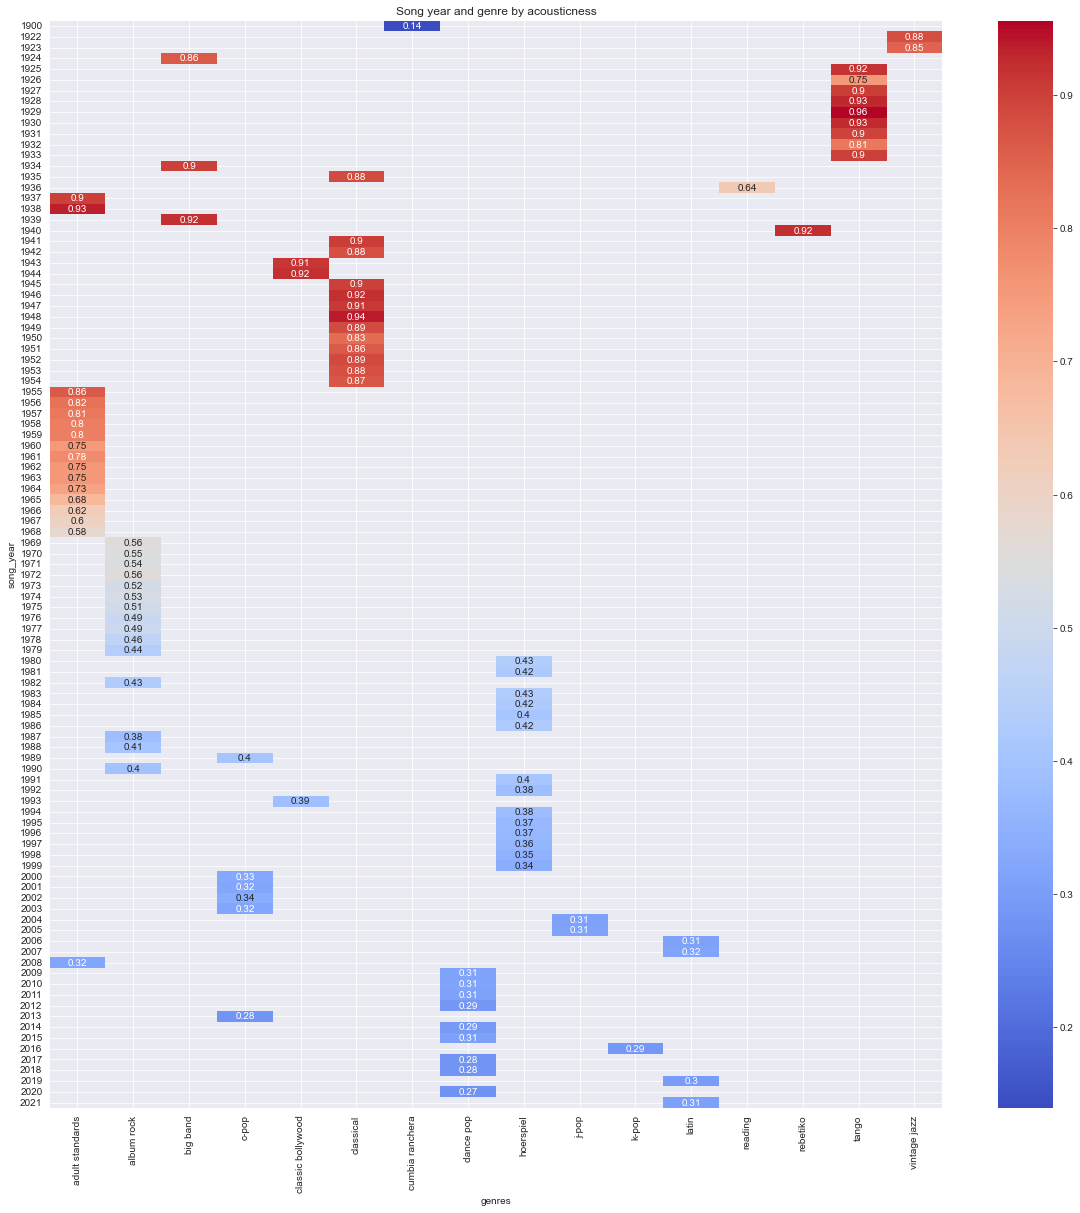

In [70]:
pivot_acc = pd.pivot_table(data=aggregates, index='song_year', columns='genres', values='acousticness')

plt.figure(figsize=(20,20))

sns.heatmap(pivot_acc, annot=True, cmap='coolwarm')
plt.title('Song year and genre by acousticness')
plt.show()

We can notice reverse tendency comparing to energy. Accousticness gets lower and lower as the time passes. And even within 
genres those values decresed significantly. For example rock music is much less acoustic in 1979 than it was in 1969.

### 3. Feature Engineering

#### 3.1 Missing data

*Categorical features*

Let's check again if we have any missing data in cat vars. We have a lot of top_genre values missing. As we calculated before
this number accounts for 11% of all column's data:

In [71]:
cat_cols = df.select_dtypes(include=['object', 'category'])
cat_cols.isnull().sum().sort_values().loc[lambda x: x > 0]

track_name        1
top_genre     58110
dtype: int64

In [72]:
df[df['top_genre'].isnull()]

track_name  \
246797             "Anne-Marie Stretter, Lol V. Stein..."   
246788             "Autoportrait, je ne comprends pas..."   
26882   "Death, When You Come to Me, May You Come to M...   
493401                         "Der Mond ist aufgegangen"   
456933  "Hiroshima mon amour", scène du film et lectur...   
...                                                   ...   
414032                            집 Home (feat. 유미 Youme)   
333671                                           처음 그 자리에   
208974                                 천국의 기억 장정우 Version   
209761                            파라다이스 (꽃보다 남자OST 메인 테마)   
525238                                                NaN   

                         top_artist  \
246797             Jean Marc Turine   
246788             Marguerite Duras   
26882                  Louis Hardin   
493401  Johann Abraham Peter Schulz   
456933                   Edji Okada   
...                             ...   
414032                  House Rulez   
333671                          이보람   
208974                          장정우   
209761                        T-Max   
525238                                

                                                  artists top_genre  \
246797           ['Jean Marc Turine', 'Marguerite Duras']       NaN   
246788                               ['Marguerite Duras']       NaN   
26882   ['Louis Hardin', 'Moondog', 'Sextet', 'The Qui...       NaN   
493401  ['Johann Abraham Peter Schulz', 'Dresdner Kreu...       NaN   
456933  ['Edji Okada', 'Emmanuelle Riva', 'Alain Resna...       NaN   
...                                                   ...       ...   
414032                        ['House Rulez', '유미 Youme']       NaN   
333671                                            ['이보람']       NaN   
208974                                            ['장정우']       NaN   
209761                                          ['T-Max']       NaN   
525238                                               ['']       NaN   

       release_date  track_popularity  artist_popularity  artist_followers  \
246797   1954-01-01                 0                0.0              16.0   
246788   1954-01-01                 0               24.0             266.0   
26882    1953-03-24                 5               34.0            1039.0   
493401   1961-01-01                 7               20.0              87.0   
456933   1954-01-01                 1                NaN               NaN   
...             ...               ...                ...               ...   
414032   2007-04-05                32               29.0            6964.0   
333671   2007-11-09                40                NaN               NaN   
208974   2003-12-24                31               23.0              11.0   
209761   2009-01-08                50               46.0            7196.0   
525238   1998-01-05                26                NaN               NaN   

        duration_sec explicit  ...  loudness  mode speechiness  acousticness  \
246797       263.655        0  ...   -21.655     1      0.8210        0.6550   
246788       819.697        0  ...   -20.766     0      0.9500        0.6260   
26882        126.173        0  ...    -5.987     1      0.0623        0.0721   
493401       218.973        0  ...   -31.976     1      0.0466        0.9920   
456933       403.070        0  ...   -21.078     0      0.6930        0.9520   
...              ...      ...  ...       ...   ...         ...           ...   
414032       244.250        0  ...    -8.265     0      0.0591        0.1080   
333671       233.213        0  ...    -5.728     1      0.0459        0.6900   
208974       280.372        0  ...    -6.347     0      0.0262        0.6590   
209761       265.960        0  ...    -1.818     0      0.1020        0.2940   
525238       289.440        0  ...    -9.460     0      0.0605        0.6900   

       instrumentalness  liveness  valence    tempo  time_signature  song_year  
246797       

Here we create generic function which fills in all missings. We group data by year and, depending if it's numeric or object 
column, we fill in NaN with mean or most frequent value:

In [73]:
def mapNullsWithValues(data, col_key, col_vals):
    
    to_df = pd.DataFrame()
    
    if (data[col_vals].dtype == object) | (data[col_vals].dtype == 'category'):
        to_df = df.groupby(col_key)[col_vals].agg(pd.Series.mode).to_frame().reset_index()
    elif (data[col_vals].dtype == 'float64') | (data[col_vals].dtype == 'int64'):
        to_df = df.groupby(col_key)[col_vals].median().to_frame().reset_index()       
    
    col_keys = to_df.iloc[:,0].to_numpy()
    col_values = to_df.iloc[:,1].to_numpy()

    dictionary = dict(zip(col_keys, col_values))
    
    data[col_vals].fillna(data[col_key].map(dictionary), inplace=True)

Now we use that function to fill in missing data with the most popular genre in each year. Genres differ a lot given a decade or even a year:

In [74]:
mapNullsWithValues(df, 'song_year', 'top_genre')

Now check if all nulls are filled:

In [75]:
df['top_genre'].isnull().sum()

0

It's ok, we have 0 missing values.

*Numerical features*

Let's check again if we have any missing data in num vars. We have 2 features which we can fill in with data. It's 2% of 
the whole column. Let's check mean and median for those columns:

In [76]:
cat_cols = df.select_dtypes(include=np.number)
cat_cols.isnull().sum().sort_values().loc[lambda x: x > 0] / len(df)

artist_popularity    0.022936
artist_followers     0.022937
dtype: float64

Now, use our function again to fill in all missing values with median for each abovementioned column grouped by year.
Let's check if we have no missing values after that:

In [77]:
mapNullsWithValues(df, 'song_year', 'artist_popularity')
mapNullsWithValues(df, 'song_year', 'artist_followers')

nan_pop = df['artist_popularity'].isnull().sum()
nan_foll = df['artist_followers'].isnull().sum()

print(f"There are {nan_pop} missing values in 'artist_popularity' column and {nan_foll} in 'artist_followers' column.")

There are 0 missing values in 'artist_popularity' column and 0 in 'artist_followers' column.


As we can see we have filled all NaNs correctly.

#### 3.2 Date features

We have extracted a year from release_date, now we can add additional column - a decade. Having this we can also analyze
how numerical features have changed over decades:

In [78]:
year_int = df['song_year'].astype(int)
mod_year=year_int % 10

df['decade'] = year_int - mod_year
df.head(10)

track_name            top_artist  \
264860                               !                 Samey   
71032   ! (The Song Formerly Known As)          Regurgitator   
347050                  !!De Repente!!               Rosendo   
568674                     !H.a.p.p.y!       Dawid Podsiadło   
463423                  !I'll Be Back!                 Rilès   
198970      !Me Voy Pal' Pueblo - Live          Toño Rosario   
324481       !Que Vida! - Mono Version                  Love   
196705                     !Uno! . . .        Julio Iglesias   
485460        " Achtung, fertig los! "  Älplerfründe Eggiwil   
249137          " Artista " Por un Mes           Omar Romano   

                                   artists                    top_genre  \
264860                   ['Samey', 'Gleb']                 czsk hip hop   
71032                     ['Regurgitator']  australian alternative rock   
347050                         ['Rosendo']                    cantautor   
568674                 ['Dawid Podsiadło']           polish alternative   
463423                           ['Rilès']               french hip hop   
198970                    ['Toño Rosario']                dominican pop   
324481                            ['Love']                    acid rock   
196705                  ['Julio Iglesias']                        latin   
485460            ['Älplerfründe Eggiwil']                   swiss folk   
249137  ['Omar Romano', 'Los Del Altillo']                     candombe   

       release_date  track_popularity  artist_popularity  artist_followers  \
264860   2019-09-01                40               46.0           45464.0   
71032    1997-11-17                52               45.0           55520.0   
347050   1986-07-01                27               53.0          193535.0   
568674   2013-05-27                36               66.0         1149268.0   
463423   2018-06-22                54               69.0          682957.0   
198970   2006-01-01                29               54.0          185434.0   
324481   1966-11-01                23               58.0          172742.0   
196705   1996-08-24                38               72.0         1560607.0   
485460   1996-03-27                22               21.0             393.0   
249137   1981-02-17                 3               11.0              99.0   

        duration_sec explicit  ...  mode  speechiness acousticness  \
264860       163.957        0  ...     1       0.5580     0.102000   
71032        206.667        1  ...     1       0.0874     0.000171   
347050       199.827        0  ...     1       0.0411     0.092200   
568674       208.680        0  ...     1       0.0268     0.673000   
463423       178.533        1  ...     1       0.2480     0.168000   
198970       267.840        0  ...     0       0.1550     0.512000   
324481       220.560        0  ...     1       0.0328     0.525000   
196705       171.640        0  ...     1       0.0366     0.838000   
485460       217.907        0  ...     1       0.0409     0.887000   
249137       190.707        0  ...     1       0.2300     0.801000   

        instrumentalness liveness  valence    tempo  time_signature  \
264860          0.000000   0.6920    0.664   84.718               4   
71032           0.003790   0.2180    0.638  114.821               4   
347050          0.000019   0.0534    0.951  123.600               4   
568674          0.000042   0.1110    0.112  100.107               4   
463423          0.000000   0.1090    0.688  142.959               4   
198970          0.545000   0.1030    0.814  136.317               4   
324481          0.003050   0.1000    0.547  125.898               4   
196705          0.000047   0.2220    0.176  168.331               5   
485460          0.931000   0.1120    0.965  127.120               4   
249137          0.000000   0.3650    0.549   95.510               4   

        song_year  decade  
264860       2019    2010  
71032        1997    1990  
3

Having this extra column we can analyze features from another perspective. As an example - let's analyze valence and explicit. 
Valence describes the positiveness of a track. The higher valence the sound is more positive, the lower valence the track is 
more negative. Explicit is obvious - 1 means explict, 0 - non explicit:

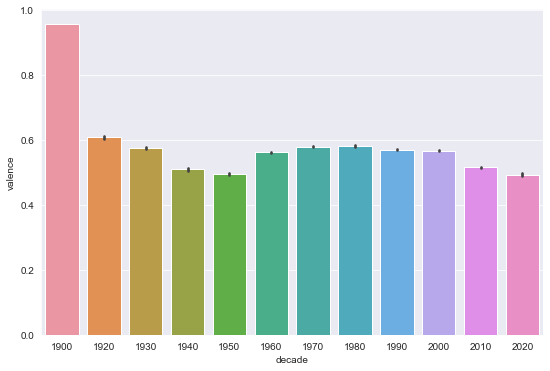

In [79]:
plt.figure(figsize=(9,6))
sns.barplot(data=df, x='decade', y='valence')
plt.show()

As we noticed the most positive tracks come from the first decades of XX century and also from years 1960-2000. 
Lower valence can be spotted in 40's and 50's which is most likely related to II World War and depression/sadness 
that came along with it.

#### 3.3 Encoding

Depending on what's the purpose of ML model we can create different categorical features based on existing features. W don't 
have ordinal features. On the other hand we have lots of unique values in top_genre column and also in song_year column
and we can use OrdinalEncoder here. Using this library let's make label encoding. We won't make hot-encoding, we have too
many categories in columns (e.g. top_genre) so we would genrate too many new columns:

In [82]:
import category_encoders as ce

encoder = ce.OrdinalEncoder()
df[['top_genre', 'song_year']] = encoder.fit_transform(df[['top_genre', 'song_year']])

df.head(10).transpose()

264860                          71032   \
track_name                           !  ! (The Song Formerly Known As)   
top_artist                       Samey                    Regurgitator   
artists              ['Samey', 'Gleb']                ['Regurgitator']   
top_genre                            1                               2   
release_date       2019-09-01 00:00:00             1997-11-17 00:00:00   
track_popularity                    40                              52   
artist_popularity                 46.0                            45.0   
artist_followers               45464.0                         55520.0   
duration_sec                   163.957                         206.667   
explicit                             0                               1   
danceability                     0.762                           0.643   
energy                           0.661                           0.934   
key                                 11                              11   
loudness                        -8.855                          -3.579   
mode                                 1                               1   
speechiness                      0.558                          0.0874   
acousticness                     0.102                        0.000171   
instrumentalness                   0.0                         0.00379   
liveness                         0.692                           0.218   
valence                          0.664                           0.638   
tempo                           84.718                         114.821   
time_signature                       4                               4   
song_year                            1                               2   
decade                            2010                            1990   

                                347050               568674  \
track_name              !!De Repente!!          !H.a.p.p.y!   
top_artist                     Rosendo      Dawid Podsiadło   
artists                    ['Rosendo']  ['Dawid Podsiadło']   
top_genre                            3                    4   
release_date       1986-07-01 00:00:00  2013-05-27 00:00:00   
track_popularity                    27                   36   
artist_popularity                 53.0                 66.0   
artist_followers              193535.0            1149268.0   
duration_sec                   199.827               208.68   
explicit                             0                    0   
danceability                     0.659                0.551   
energy                           0.893                0.332   
key                                  5                   10   
loudness                        -8.531              -11.797   
mode                                 1                    1   
speechiness                     0.0411               0.0268   
acousticness                    0.0922                0.673   
instrumentalness              0.000019             0.000042   
liveness                        0.0534                0.111   
valence                          0.951                0.112   
tempo                            123.6              100.107   
time_signature                       4                    4   
song_year                            3                    4   
decade                            1980                 2010   

                                463423                      198970  \
track_name              !I'll Be Back!  !Me Voy Pal' Pueblo - Live   
top_artist                       Rilès                Toño Rosario   
artists                      ['Rilès']            ['Toño Rosario']   
top_genre                            5                           6   
release_date       2018-06-22 00:00:00         2006-01-01 00:00:00   
track_popularity                    54                          29   
artist_popularity                 69.0                        54.0   
artist_followers              682957.0       

#### 4. Conclusion

And this is a wrap-up of this notebook. We performed vast and detailed analysis with a bunch of interesting insights. We have
found a correlation between features, especially between energy and loudness, loudness and acousticness, artist_popularity 
and track_popularity. We have also noticed that tracks duration has decreased - songs are just shorter nowadays (2010 onwards). They are
also louder and more energetic. 

Heatmaps and boxplots have showed us tendency and patterns in music industry over the past century. We are also able to conclude
that most of the features had changed their values somewhere around 60's which is tightly connected to rock'n roll revolution happening
at that time. 

Depending on our further analysis we could add some data transformation (normalization, transformation) as well as polynomial
transformation and others. 